In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df1=pd.read_csv('decomposition.csv')
df1.head(5)

T=10   T=16   T=22  mean
0  4.07  10.21  17.12  8.93
1  3.20   1.89  15.42  4.54
2  2.94   6.09  11.00  5.81
3  3.78   7.23  12.30  6.95
4  2.35   5.90   9.20  5.03

In [2]:
df2=pd.read_csv('extension.csv')
df2.head(5)

T=10  T=16  T=22
0  0.30  0.36  0.34
1  0.18  0.26  0.38
2  0.26  0.24  0.32
3  0.16  0.30  0.24
4  0.20  0.24  0.40

In [3]:
rate1=df1['T=10']
rate2=df1['T=16']
rate3=df1['T=22']

In [4]:
extension1=df2['T=10']
extension2=df2['T=16']
extension3=df2['T=22']

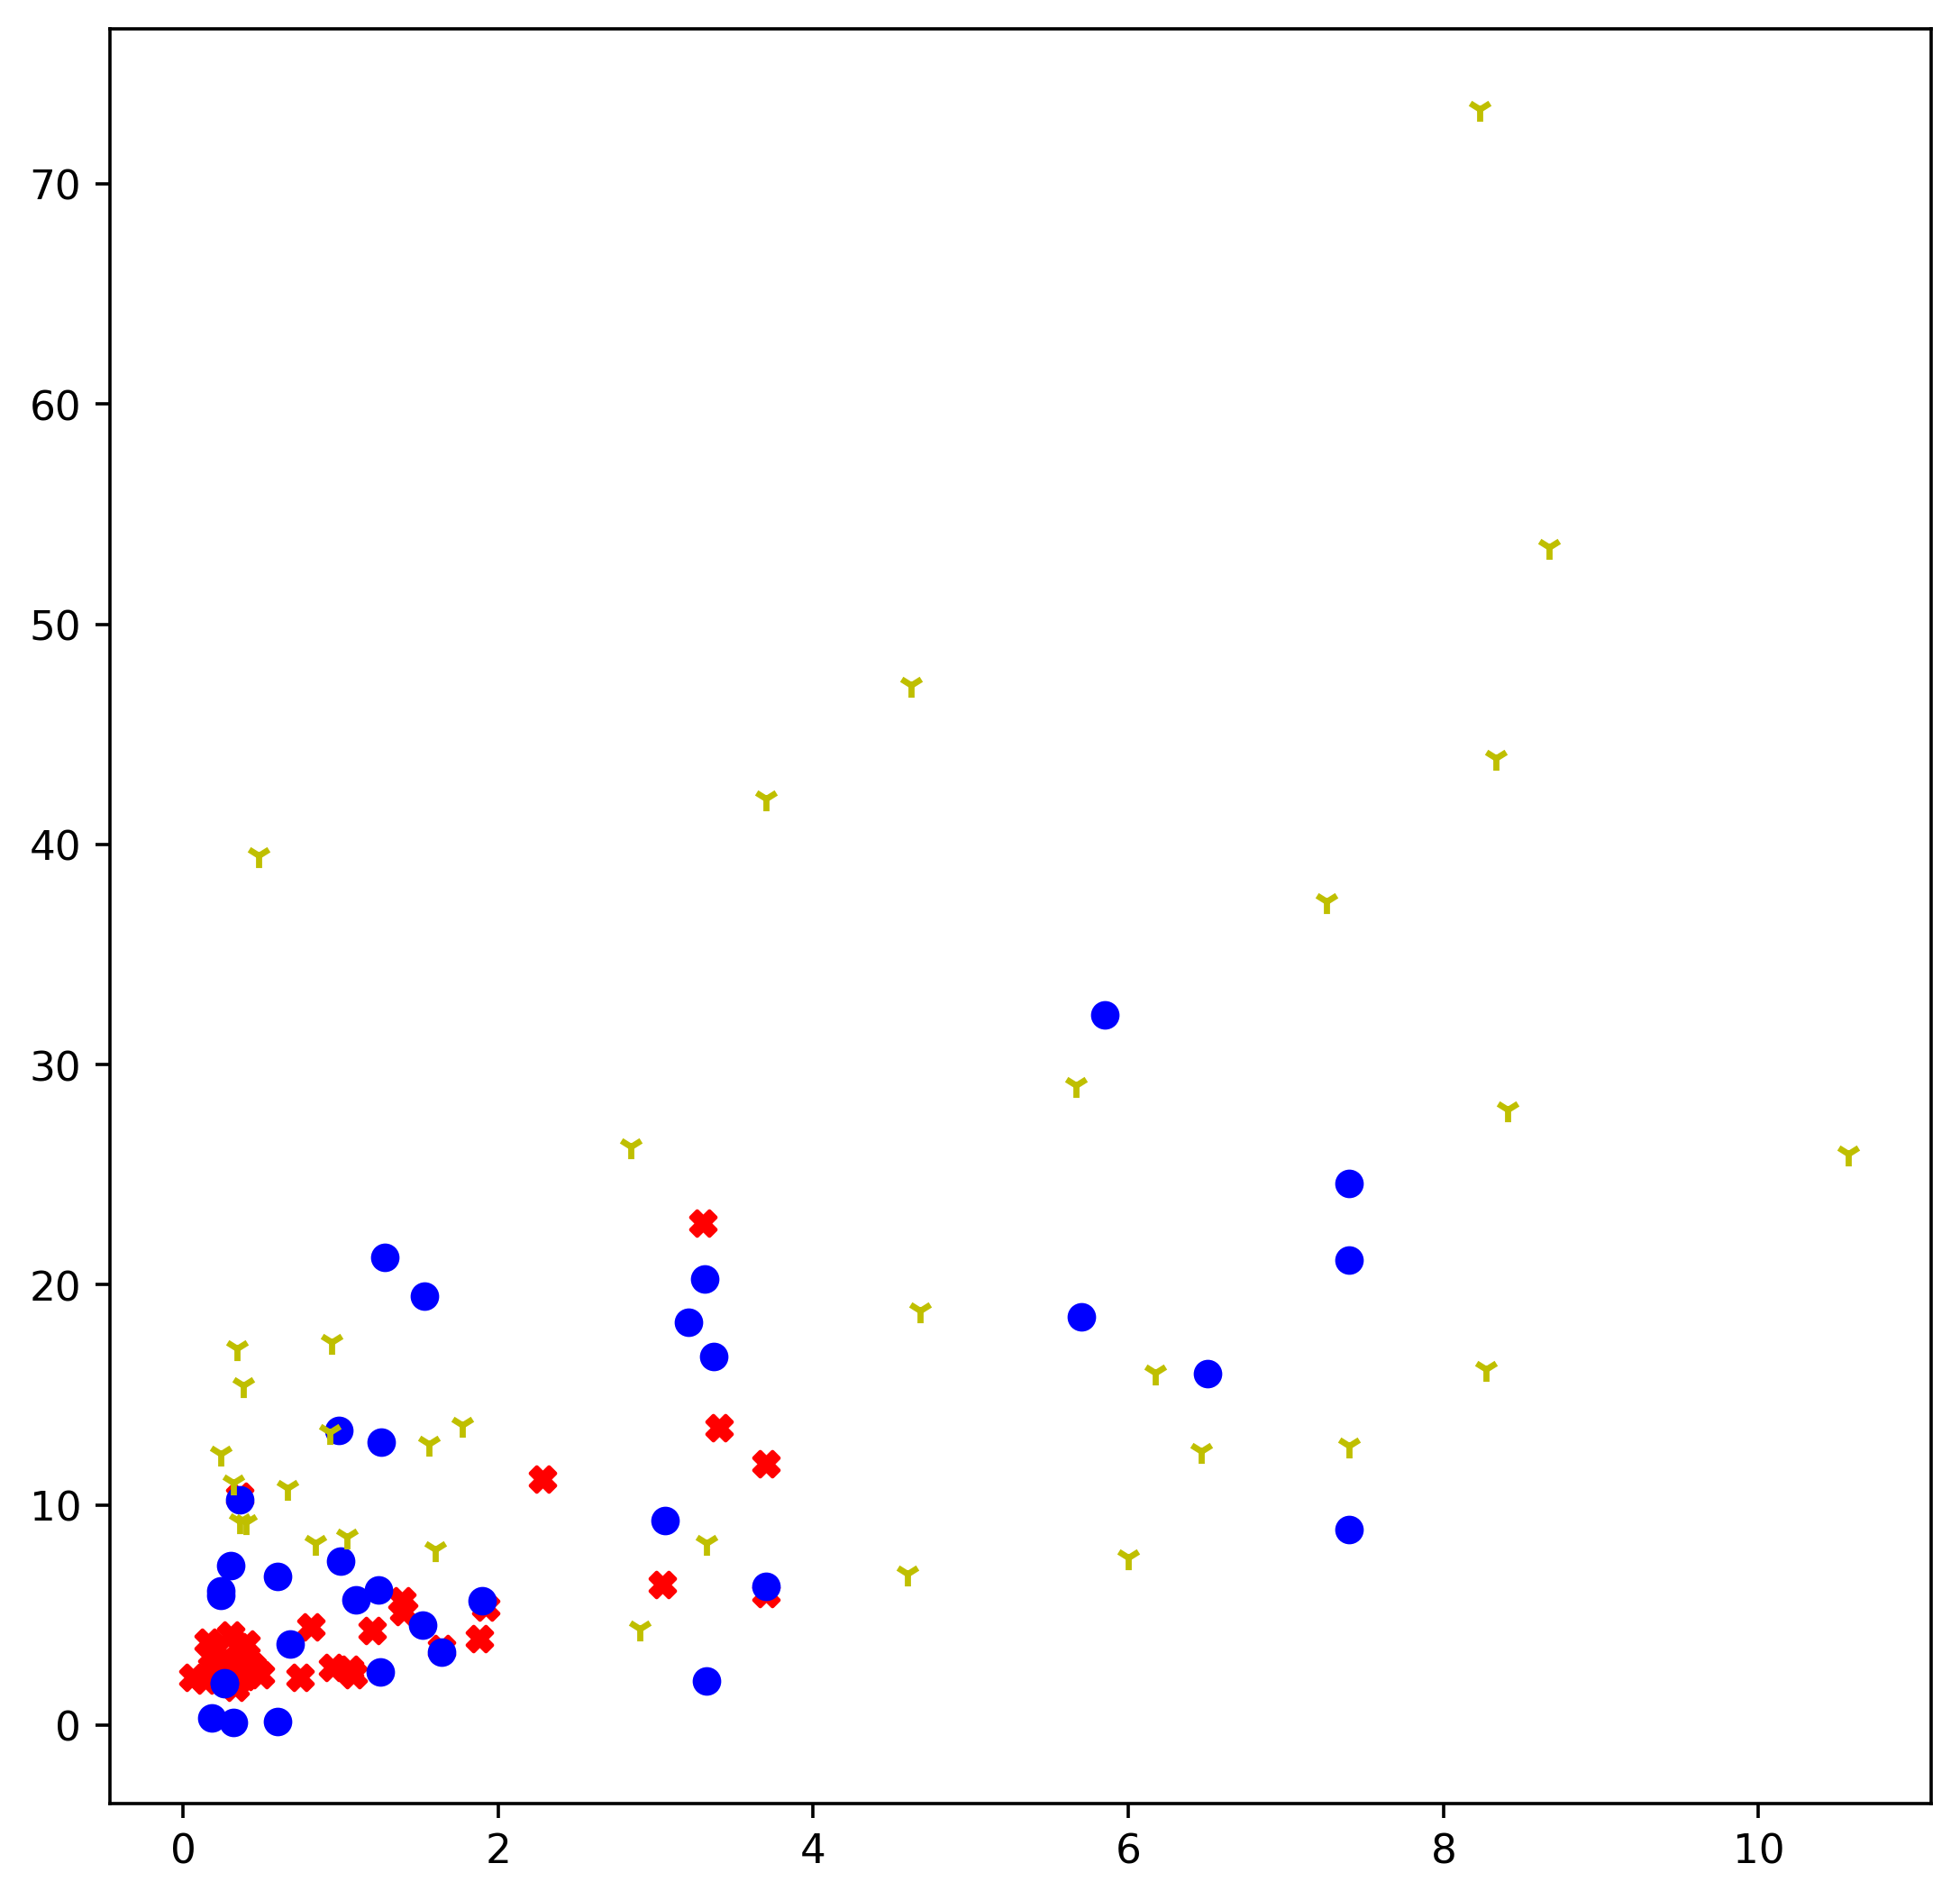

In [5]:
#绘制散点图
plt.figure(figsize=(8,8),dpi=326)
#ax1=plt.subplot(131)
plt.scatter(extension1,rate1,c='r',marker='X')
#ax2=plt.subplot(132)
plt.scatter(extension2,rate2,c='b',marker='o')
#ax3=plt.subplot(133)
plt.scatter(extension3,rate3,c='y',marker='1')
plt.show()

In [6]:
df3=pd.DataFrame({'extension':extension1,'rate':rate1})
df3=df3.sort_values(by=['extension'])
df4=pd.DataFrame({'extension':extension2,'rate':rate2})
df4=df4.sort_values(by=['extension'])
df5=pd.DataFrame({'extension':extension3,'rate':rate3})
df5=df5.sort_values(by=['extension'])


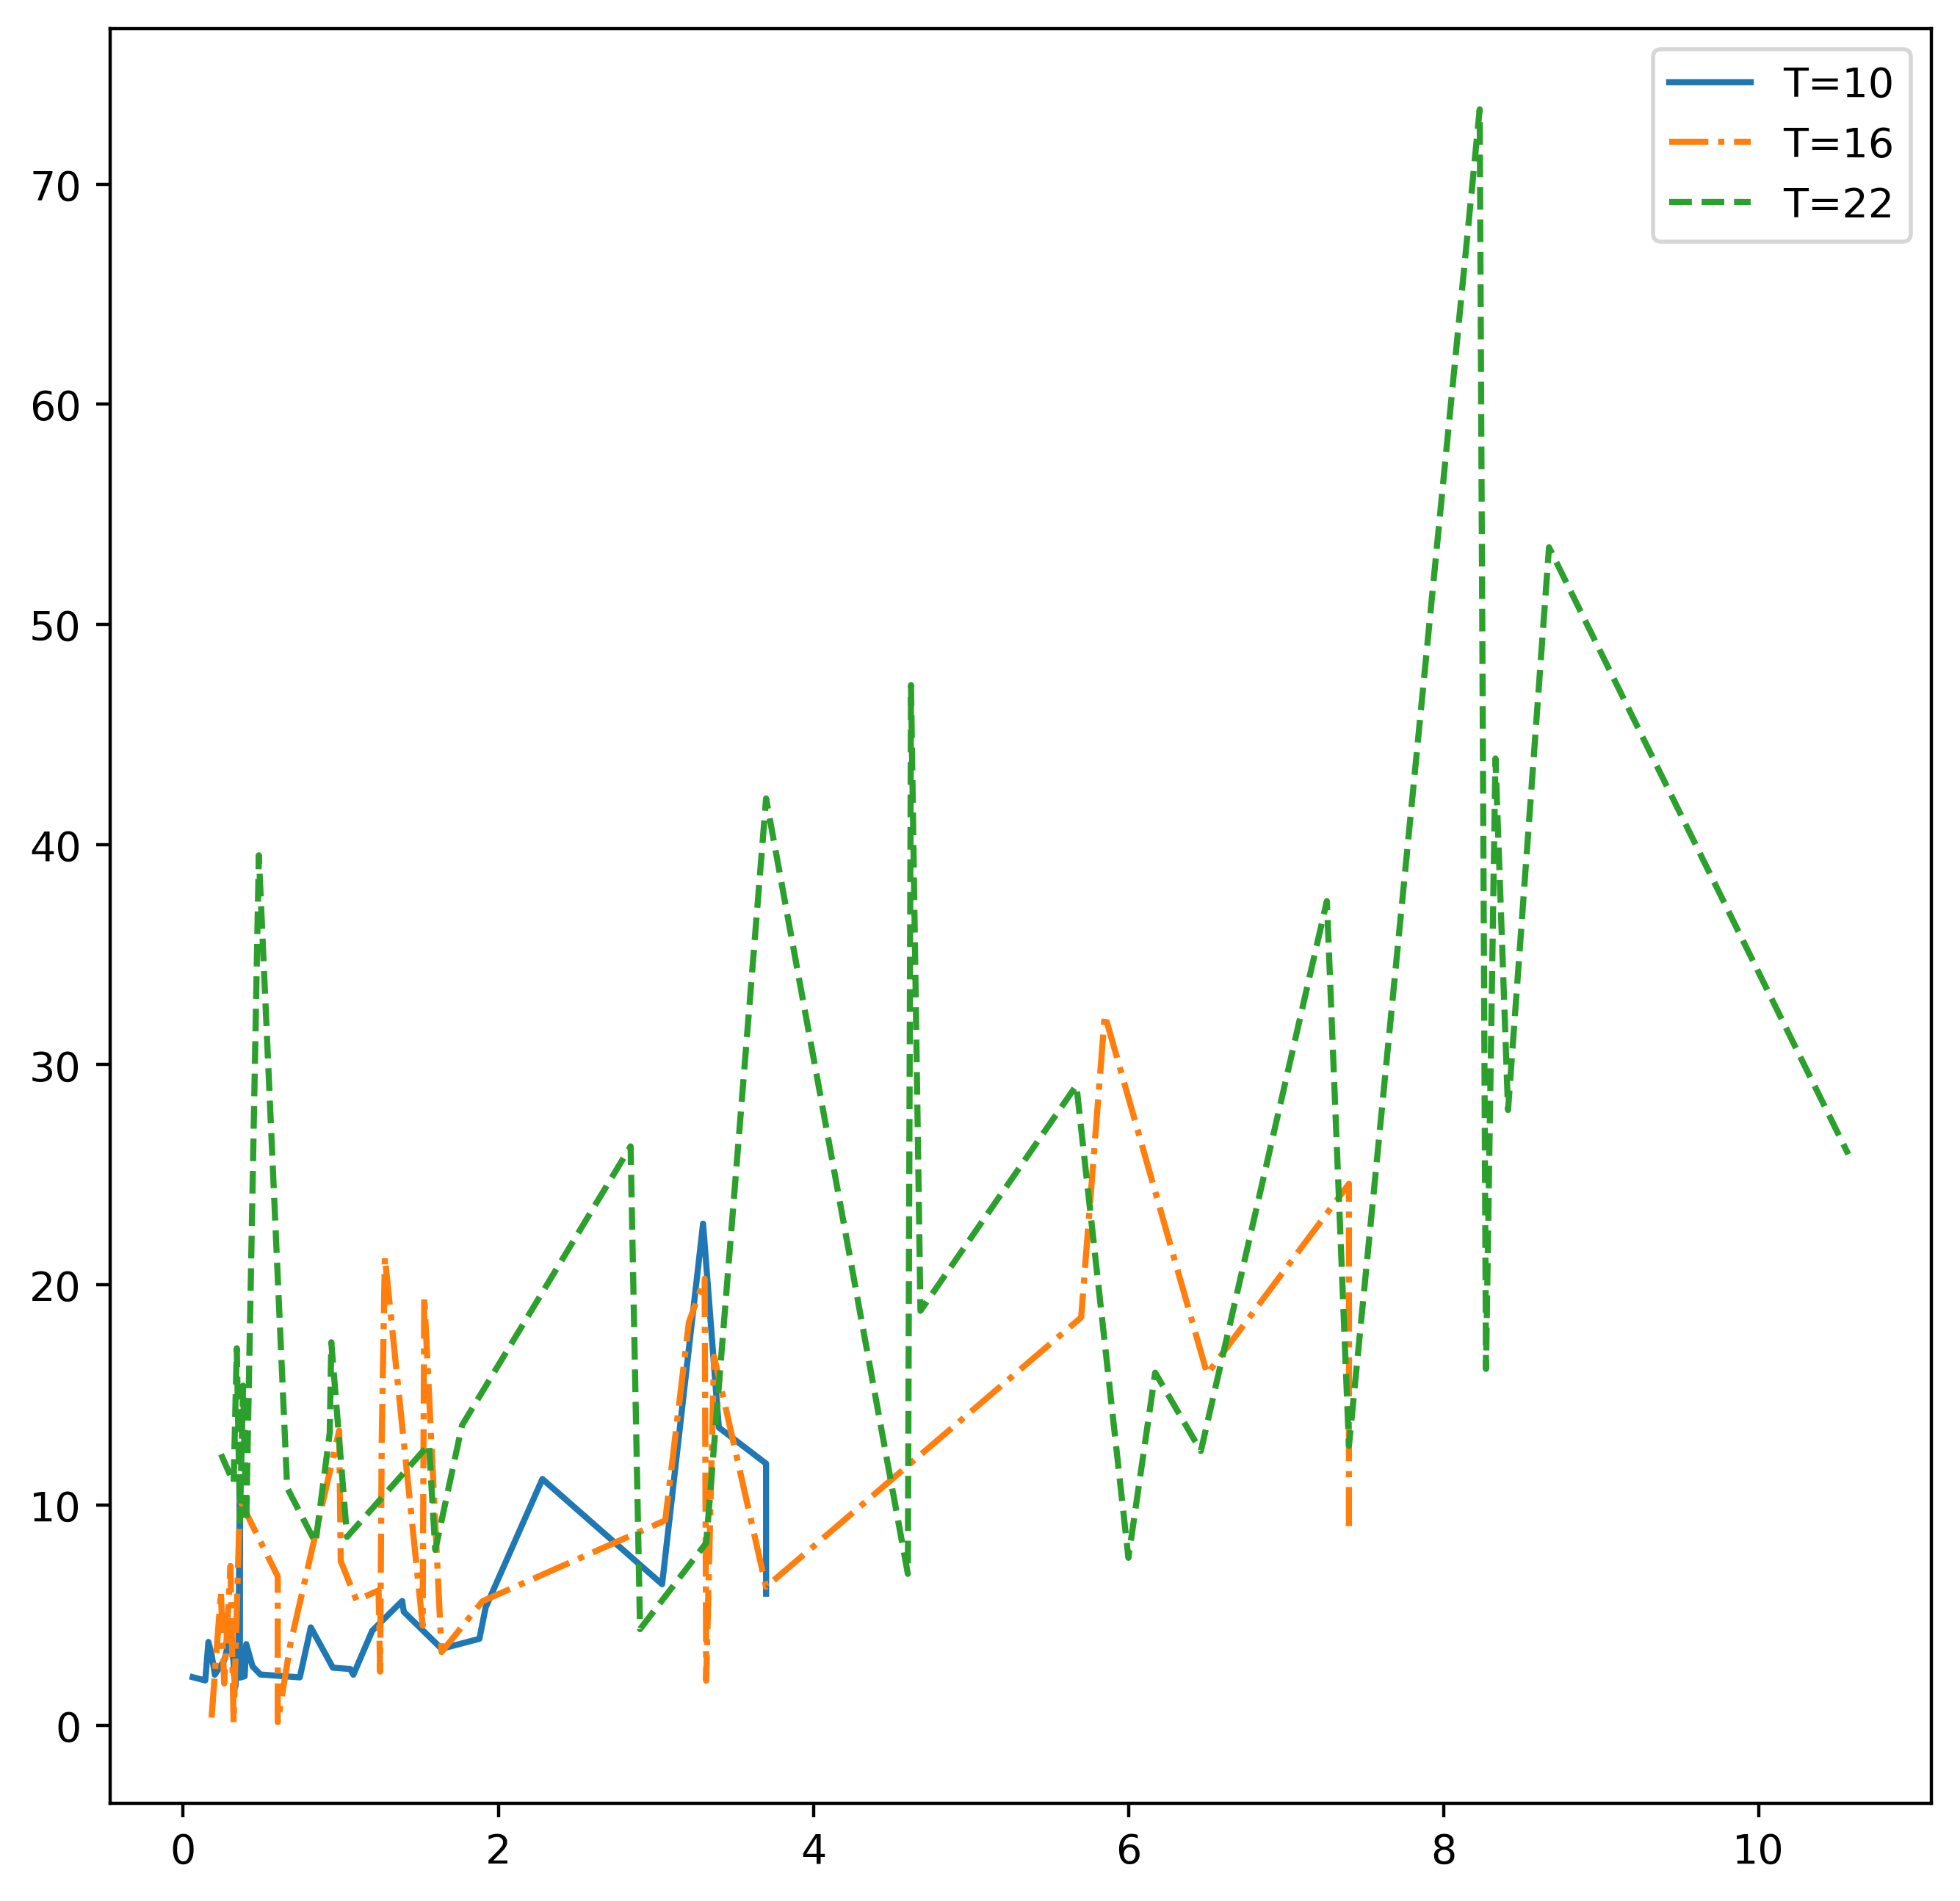

In [7]:
plt.figure(figsize=(8,8),dpi=400)
plt.plot(df3['extension'],df3['rate'])
plt.plot(df4['extension'],df4['rate'],ls='-.')
plt.plot(df5['extension'],df5['rate'],ls='--')
plt.legend(['T=10','T=16','T=22'])

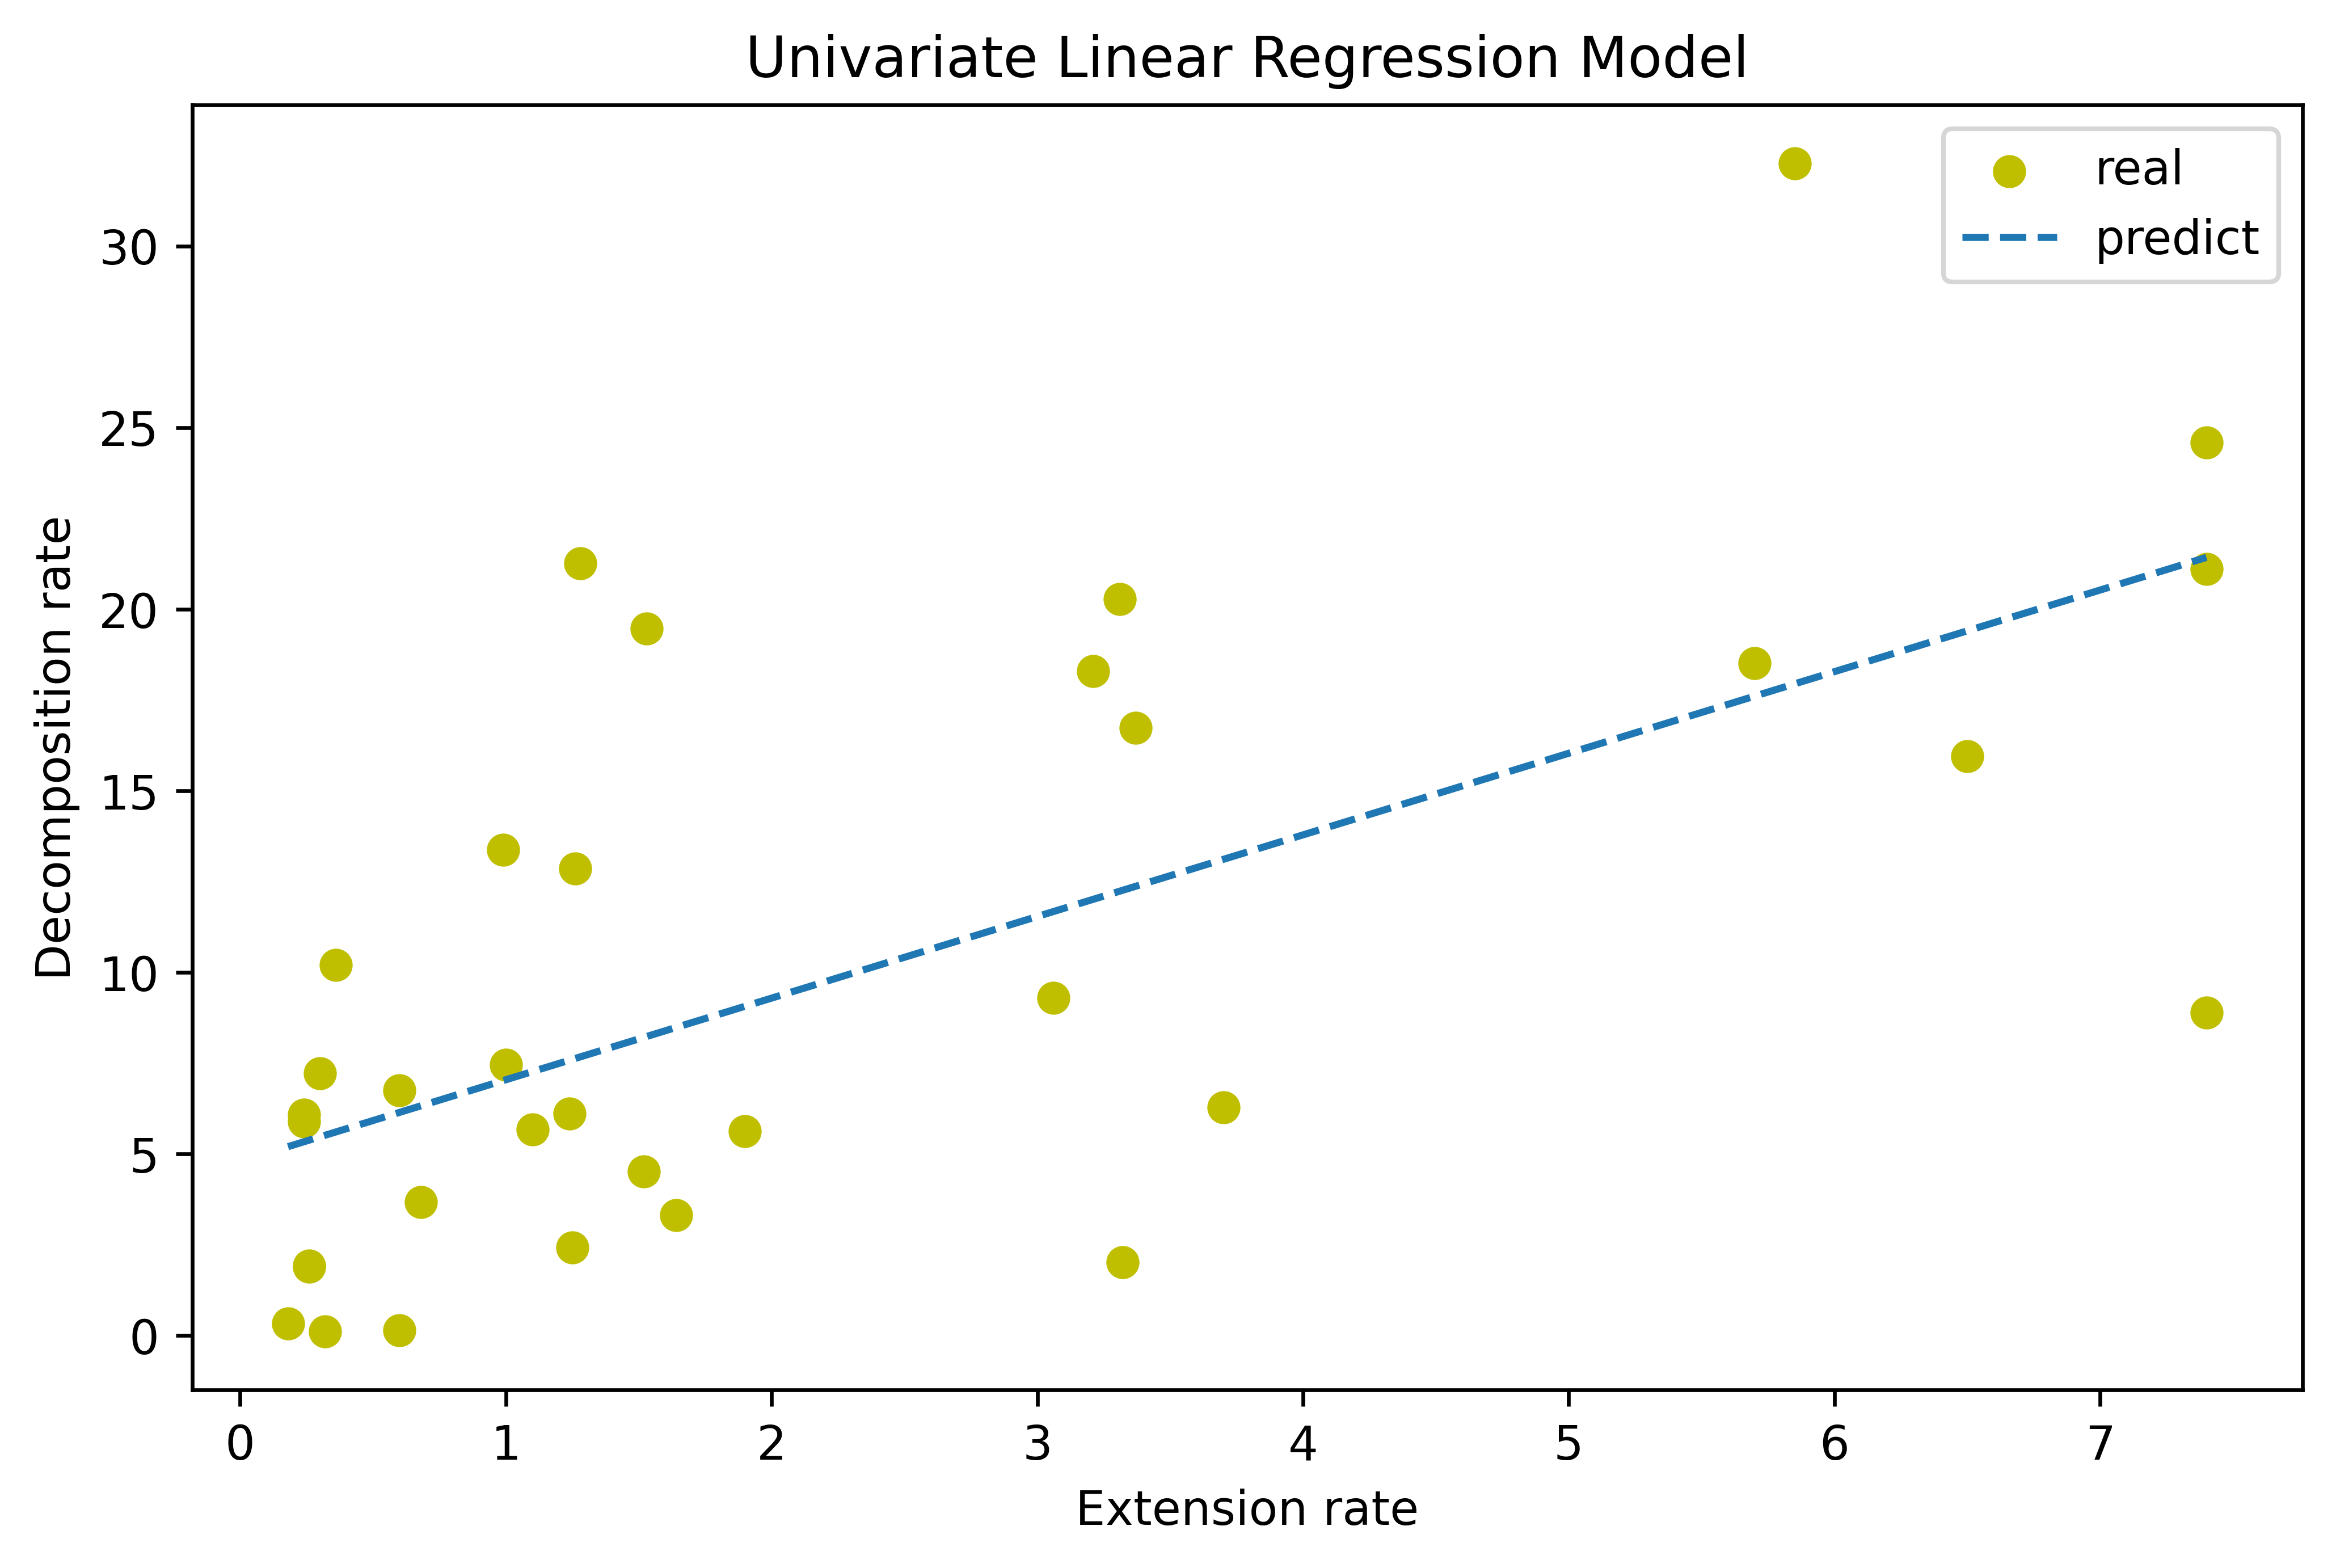

In [8]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(df4['extension'].values.reshape(-1,1),df4['rate'].values.reshape(-1,1))
rate_predict=model_2.predict(df4['extension'].values.reshape(-1,1))

plt.figure(figsize=(8,5),dpi=600)
plt.title('Univariate Linear Regression Model')
plt.scatter(df4['extension'],df4['rate'],marker='o',c='y',label='real')
plt.plot(df4['extension'],rate_predict,ls='--',label='predict')
plt.xlabel('Extension rate')
plt.ylabel('Decomposition rate')
plt.legend()
plt.savefig('/Users/bingbing/Desktop/分解速率与延伸速率.png')

In [9]:
a  = model_2.intercept_#截距

b = model_2.coef_#回归系数
print(a,b)

[4.7989213] [[2.24701375]]


In [10]:
import math
mos=(np.log(df4['rate'].values.reshape(-1))-1.82)/0.82
df4['mos']=mos
df4

extension   rate       mos
7        0.18   0.34 -3.535134
2        0.24   6.09 -0.016283
4        0.24   5.90 -0.054936
1        0.26   1.89 -1.443199
6        0.26   1.92 -1.423994
3        0.30   7.23  0.192974
5        0.32   0.11 -4.911311
0        0.36  10.21  0.613863
8        0.60   6.76  0.111004
9        0.60   0.14 -4.617211
10       0.68   3.67 -0.633913
12       0.99  13.38  0.943611
33       1.00   7.45  0.229529
17       1.10   5.67 -0.103428
26       1.24   6.12 -0.010290
24       1.25   2.43 -1.136718
23       1.26  12.86  0.895270
11       1.28  21.26  1.508326
25       1.52   4.52 -0.379863
22       1.53  19.47  1.401067
31       1.64   3.32 -0.756141
14       1.90   5.63 -0.112062
16       3.06   9.30  0.500018
29       3.21  18.30  1.325489
15       3.31  20.28  1.450775
30       3.32   2.02 -1.362076
32       3.37  16.74  1.216831
13       3.70   6.28  0.021183
20       5.70  18.52  1.340062
18       5.85  32.27  2.017241
19       6.50  15.95  1.157877
27       7.40  24.59  1.685780
28       7.40  21.10  1.499113
21       7.40   8.89  0.445033

In [11]:
'''
PCA 主成分分析
'''
Y=df4['rate']
X=df4.drop('rate',axis=1)
X

extension       mos
7        0.18 -3.535134
2        0.24 -0.016283
4        0.24 -0.054936
1        0.26 -1.443199
6        0.26 -1.423994
3        0.30  0.192974
5        0.32 -4.911311
0        0.36  0.613863
8        0.60  0.111004
9        0.60 -4.617211
10       0.68 -0.633913
12       0.99  0.943611
33       1.00  0.229529
17       1.10 -0.103428
26       1.24 -0.010290
24       1.25 -1.136718
23       1.26  0.895270
11       1.28  1.508326
25       1.52 -0.379863
22       1.53  1.401067
31       1.64 -0.756141
14       1.90 -0.112062
16       3.06  0.500018
29       3.21  1.325489
15       3.31  1.450775
30       3.32 -1.362076
32       3.37  1.216831
13       3.70  0.021183
20       5.70  1.340062
18       5.85  2.017241
19       6.50  1.157877
27       7.40  1.685780
28       7.40  1.499113
21       7.40  0.445033

In [12]:
#使用PCA主成分分析进行确定方差贡献率
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
#特征值 返回所保留的n个成分各自方差的百分比
print(pca.explained_variance_)
w1=pca.explained_variance_[0]/(pca.explained_variance_[0]+pca.explained_variance_[1])
w2=pca.explained_variance_[1]/(pca.explained_variance_[0]+pca.explained_variance_[1])
print(w1,w2)


[6.47580385 1.69067071]
0.7929742269155454 0.20702577308445452


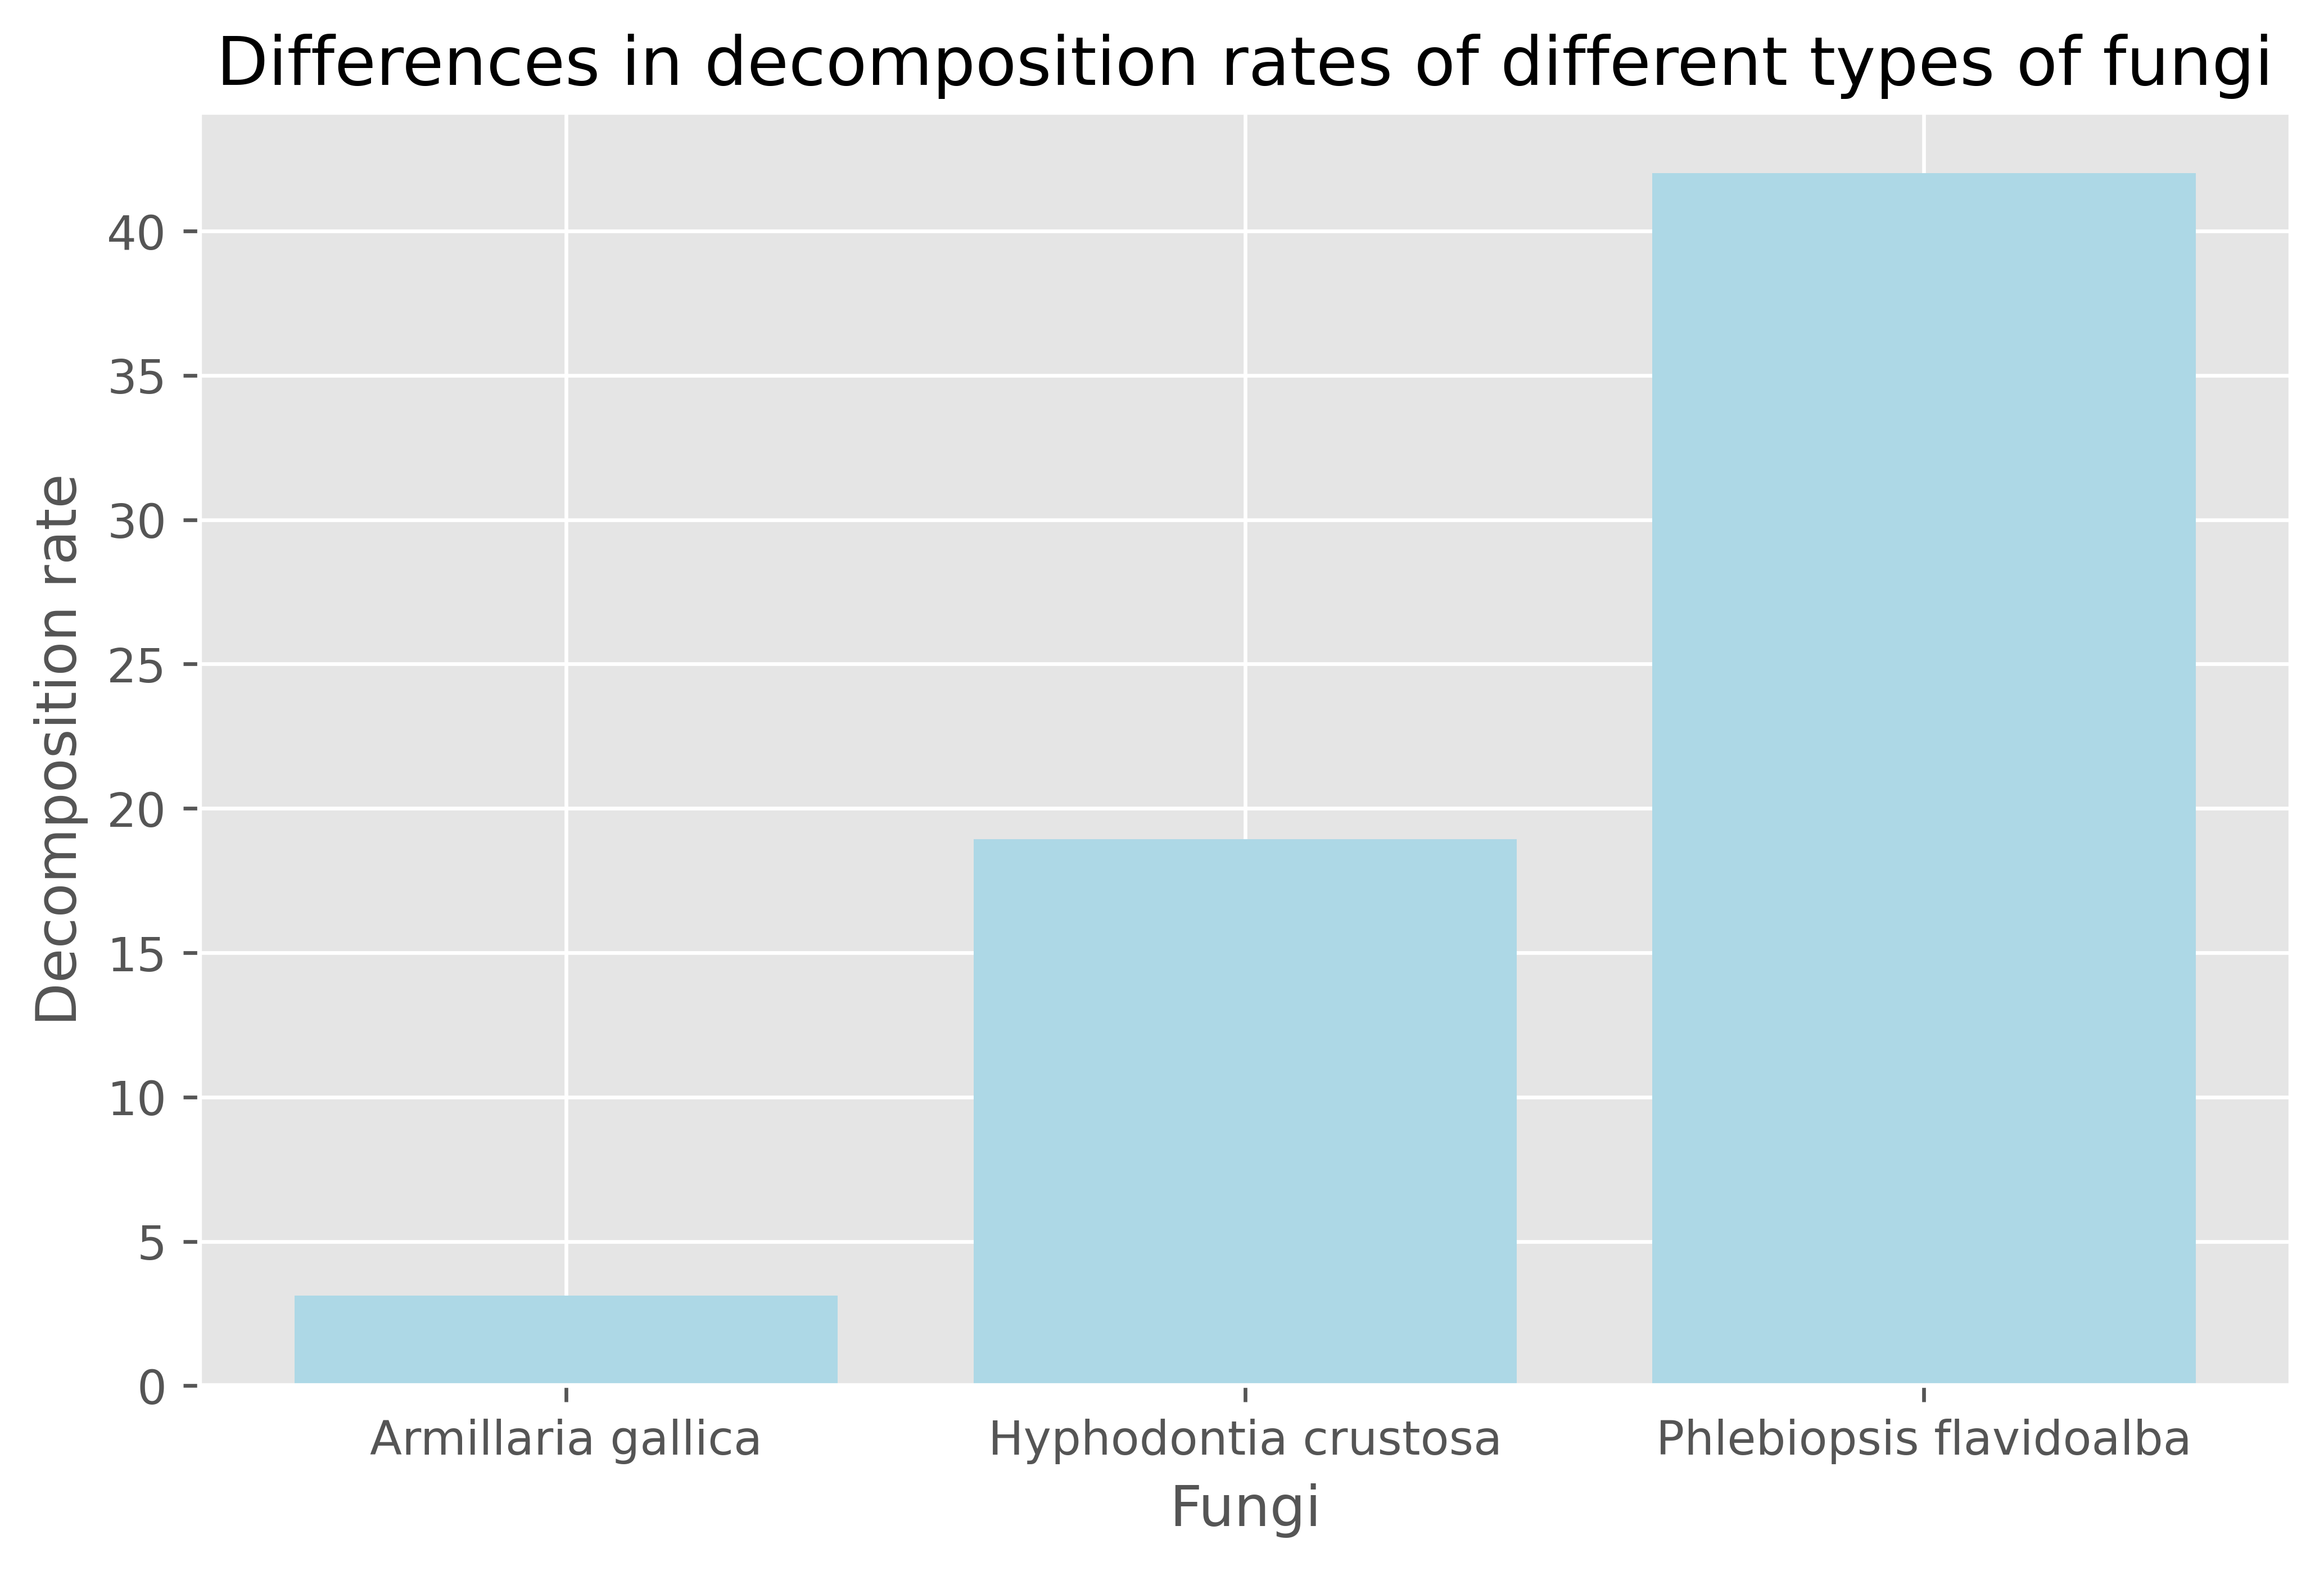

In [13]:
rate_score=[]
index=[5,12,20]
for i in range(3):
    score=(df4.loc[index[i]]['extension']*4.80+2.25)*w1+math.e**(df4.loc[index[i]]['mos']*0.82+1.82)
    rate_score.append(score)
plt.figure(figsize=(8,5),dpi=600)
plt.style.use('ggplot')
plt.title('Differences in decomposition rates of different types of fungi')
plt.bar(['Armillaria gallica','Hyphodontia crustosa','Phlebiopsis flavidoalba'],rate_score,color = 'lightblue')
plt.xlabel('Fungi')
plt.ylabel('Decomposition rate')

plt.savefig('/Users/bingbing/Desktop/第二问.png')

In [14]:
df6=pd.read_csv('plant.csv')
df6.head(5)

plant  site  years_decayed     mesh sampling_side  \
0  Celtis occidentalis     2              3   absent          both   
1  Celtis occidentalis     2              3  present          both   
2  Celtis occidentalis     6              3   absent          both   
3  Celtis occidentalis     6              3  present          both   
4  Celtis occidentalis     7              3   absent        bottom   

   extension_rate  mass_loss  
0           13.19       37.4  
1            1.10       29.8  
2            0.92       33.0  
3            9.90       45.7  
4           13.54       49.0

In [15]:
df6_1=df6[(df6['mesh']=='absent')]
df6_1

plant  site  years_decayed    mesh sampling_side  \
0     Celtis occidentalis     2              3  absent          both   
2     Celtis occidentalis     6              3  absent          both   
4     Celtis occidentalis     7              3  absent        bottom   
6      Fraxinus americana     2              3  absent        bottom   
8      Fraxinus americana     6              3  absent          both   
10     Fraxinus americana     7              3  absent          both   
12          Juglans nigra     2              3  absent          both   
14          Juglans nigra     6              3  absent        bottom   
16          Juglans nigra     7              3  absent        bottom   
19       Lonicera maackii     2              3  absent          both   
21       Lonicera maackii     6              3  absent        bottom   
23       Lonicera maackii     7              3  absent          both   
25         Pinus echinata     2              3  absent        bottom   
26           Quercus alba     2              3  absent          both   
28           Quercus alba     6              3  absent          both   
30           Quercus alba     7              3  absent          both   
32       Quercus velutina     2              3  absent          both   
34       Quercus velutina     6              3  absent          both   
36       Quercus velutina     7              3  absent        bottom   
38            Acer rubrum     2              5  absent        bottom   
39        Aesculus glabra     2              5  absent          both   
40        Aesculus glabra     6              5  absent          both   
41        Aesculus glabra     7              5  absent          both   
42    Amelanchier arborea     2              5  absent           top   
43    Amelanchier arborea     6              5  absent           top   
44    Amelanchier arborea     7              5  absent       neither   
45        Asimina triloba     2              5  absent          both   
46        Asimina triloba     6              5  absent        bottom   
47        Asimina triloba     7              5  absent           top   
48        Carya tomentosa     6              5  absent          both   
49        Carya tomentosa     7              5  absent        bottom   
50    Celtis occidentalis     2              5  absent           top   
51    Celtis occidentalis     6              5  absent          both   
52         Cornus florida     2              5  absent           top   
53         Cornus florida     6              5  absent           top   
54         Cornus florida     7              5  absent        bottom   
55   Diospyros virginiana     2              5  absent           top   
56   Diospyros virginiana     6              5  absent           top   
57   Diospyros virginiana     7              5  absent           top   
58  Gleditsia triacanthos     2              5  absent          both   
59  Gleditsia triacanthos     6              5  absent          both   
60   Juniperus virginiana     2              5  absent        bottom   
61   Juniperus virginiana     6              5  absent        bottom   
62   Juniperus virginiana     7              5  absent        bottom   
63          Pinus strobus     6              5  absent          both   
64  Platanus occidentalis     2              5  absent          both   
65  Platanus occidentalis     6              5  absent        bottom   
66  Platanus occidentalis     7              5  absent          both   
67       Quercus velutina     2              5  absent           top   
68       Quercus velutina     6              5  absent        bottom   
69       Quercus velutina     7              5  absent        bottom   
70            Ulmus rubra     2              5  absent        bottom   
71            Ulmus rubra     6              5  absent          both   
72            Ulmus rubra     7              5  absent          both   
73          Vitis vulpina     6              5  absent      

In [16]:
index_list=df6_1['plant'].value_counts().index
score_list=[]
'''
因为我们的基质的种类会影响到我们的组合真菌的分解速率，定义一个评价基质 是否容易分解的指标0-1 这个指标由相同条件下mass_loss来确定，
针对于单个的plant来说，mass_loss的值越大，评价指标的值越大
'''
for index in index_list:
    #print(index)
    df6_2=df6_1[df6_1['plant']==index]
    score=sum(df6_2['mass_loss'])/len(df6_2['mass_loss'])
    score_list.append(score)
df6_3=pd.DataFrame({'plant':index_list,'score':score_list})
df6_3

plant      score
0        Quercus velutina  48.583333
1     Celtis occidentalis  49.940000
2     Amelanchier arborea  78.766667
3             Ulmus rubra  57.666667
4   Platanus occidentalis  71.233333
5    Juniperus virginiana  32.533333
6    Diospyros virginiana  78.766667
7          Cornus florida  56.933333
8      Fraxinus americana  17.400000
9         Asimina triloba  64.233333
10        Aesculus glabra  81.166667
11           Quercus alba  50.766667
12       Lonicera maackii  25.533333
13          Juglans nigra  27.566667
14        Carya tomentosa  62.850000
15  Gleditsia triacanthos  60.450000
16            Acer rubrum  80.200000
17         Pinus echinata  27.700000
18          Pinus strobus  50.700000
19          Vitis vulpina  66.300000

In [17]:
#使用最大最小化归一：
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df6_3['score']=scaler.fit_transform(df6_3['score'].values.reshape(-1,1))
df6_3.to_csv('zhibiao.csv')

In [18]:
print(df6_1.shape)
for i in range(df6_1.shape[0]):
    if df6_1.iloc[i:i+1,0:1].values:
        index=str(df6_1.iloc[i:i+1,0:1].values.reshape(-1))[2:-2]
        index2=str(df6_1.iloc[i:i+1,4:5].values.reshape(-1))[2:-2]
        #print(df6_3[df6_3['plant']==index]['score'].values)
        df6_1.iloc[i:i+1,0:1]=df6_3[df6_3['plant']==index]['score']
    #修改sampling_side的数据 bottom 0.8 top 0.2 both 0.5
    if index2=='both':
        df6_1.iloc[i:i+1,4:5]=0.5
    elif index2=='bottom':
        df6_1.iloc[i:i+1,4:5]=0.8
    elif index2=='top':
        df6_1.iloc[i:i+1,4:5]=0.2
    elif index2=='neither':
        df6_1.iloc[i:i+1,4:5]=0.5
df6_1

(55, 7)


/Users/bingbing/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/bingbing/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


plant  site  years_decayed    mesh sampling_side  extension_rate  \
0   0.510298     2              3  absent           0.5           13.19   
2   0.510298     6              3  absent           0.5            0.92   
4   0.510298     7              3  absent           0.8           13.54   
6        0.0     2              3  absent           0.8            4.64   
8        0.0     6              3  absent           0.5            5.90   
10       0.0     7              3  absent           0.5           13.60   
12  0.159435     2              3  absent           0.5            2.33   
14  0.159435     6              3  absent           0.8           15.96   
16  0.159435     7              3  absent           0.8           16.48   
19  0.127548     2              3  absent           0.5           10.84   
21  0.127548     6              3  absent           0.8           15.36   
23  0.127548     7              3  absent           0.5           15.66   
25  0.161526     2              3  absent           0.8            1.26   
26  0.523262     2              3  absent           0.5           12.08   
28  0.523262     6              3  absent           0.5           13.30   
30  0.523262     7              3  absent           0.5           16.40   
32  0.489022     2              3  absent           0.5            1.98   
34  0.489022     6              3  absent           0.5            2.05   
36  0.489022     7              3  absent           0.8           15.86   
38  0.984841     2              5  absent           0.8           16.03   
39       1.0     2              5  absent           0.5           15.57   
40       1.0     6              5  absent           0.5           14.38   
41       1.0     7              5  absent           0.5            6.65   
42  0.962363     2              5  absent           0.2            0.22   
43  0.962363     6              5  absent           0.2            7.13   
44  0.962363     7              5  absent           0.5            7.82   
45  0.734449     2              5  absent           0.5            4.69   
46  0.734449     6              5  absent           0.8           15.86   
47  0.734449     7              5  absent           0.2            2.66   
48  0.712755     6              5  absent           0.5           14.33   
49  0.712755     7              5  absent           0.8           15.41   
50  0.510298     2              5  absent           0.2            1.45   
51  0.510298     6              5  absent           0.5            1.08   
52  0.619969     2              5  absent           0.2            3.38   
53  0.619969     6              5  absent           0.2            0.26   
54  0.619969     7              5  absent           0.8            1.34   
55  0.962363     2              5  absent           0.2            1.94   
56  0.962363     6              5  absent           0.2           15.09   
57  0.962363     7              5  absent           0.2           15.19   
58  0.675118     2              5  absent           0.5            7.49   
59  0.675118     6              5  absent           0.5            0.09   
60  0.237324     2              5  absent           0.8            0.02   
61  0.237324     6              5  absent           0.8            0.64   
62  0.237324     7              5  absent           0.8            6.29   
63  0.522216     6              5  absent           0.5            5.33   
64  0.844224     2              5  absent           0.5            3.18   
65  0.844224     6              5  absent           0.8            0.43   
66  0.844224     7              5  absent           0.5            2.26   
67  0.489022     2              5  absent           0.2            0.06   
68  0.489022     6              5  absent           0.8            1.48   
69  0.489022     7              5  absent           0.8            1.90   
70  0.631469     2              5  absent           0.8            0.34   
71  0.631469     6              

In [19]:
df6_1=df6_1.drop('mesh',axis=1)
df6_1

plant  site  years_decayed sampling_side  extension_rate  mass_loss
0   0.510298     2              3           0.5           13.19       37.4
2   0.510298     6              3           0.5            0.92       33.0
4   0.510298     7              3           0.8           13.54       49.0
6        0.0     2              3           0.8            4.64       12.6
8        0.0     6              3           0.5            5.90       13.6
10       0.0     7              3           0.5           13.60       26.0
12  0.159435     2              3           0.5            2.33       19.9
14  0.159435     6              3           0.8           15.96       26.2
16  0.159435     7              3           0.8           16.48       36.6
19  0.127548     2              3           0.5           10.84       25.2
21  0.127548     6              3           0.8           15.36       23.2
23  0.127548     7              3           0.5           15.66       28.2
25  0.161526     2              3           0.8            1.26       27.7
26  0.523262     2              3           0.5           12.08       46.9
28  0.523262     6              3           0.5           13.30       46.2
30  0.523262     7              3           0.5           16.40       59.2
32  0.489022     2              3           0.5            1.98       25.3
34  0.489022     6              3           0.5            2.05       27.9
36  0.489022     7              3           0.8           15.86       53.2
38  0.984841     2              5           0.8           16.03       80.2
39       1.0     2              5           0.5           15.57       81.9
40       1.0     6              5           0.5           14.38       81.5
41       1.0     7              5           0.5            6.65       80.1
42  0.962363     2              5           0.2            0.22       57.3
43  0.962363     6              5           0.2            7.13       81.5
44  0.962363     7              5           0.5            7.82       97.5
45  0.734449     2              5           0.5            4.69       46.1
46  0.734449     6              5           0.8           15.86       67.6
47  0.734449     7              5           0.2            2.66       79.0
48  0.712755     6              5           0.5           14.33       56.9
49  0.712755     7              5           0.8           15.41       68.8
50  0.510298     2              5           0.2            1.45       60.4
51  0.510298     6              5           0.5            1.08       69.9
52  0.619969     2              5           0.2            3.38       47.8
53  0.619969     6              5           0.2            0.26       54.5
54  0.619969     7              5           0.8            1.34       68.5
55  0.962363     2              5           0.2            1.94       67.0
56  0.962363     6              5           0.2           15.09       84.7
57  0.962363     7              5           0.2           15.19       84.6
58  0.675118     2              5           0.5            7.49       58.8
59  0.675118     6              5           0.5            0.09       62.1
60  0.237324     2              5           0.8            0.02       37.9
61  0.237324     6              5           0.8            0.64       27.6
62  0.237324     7              5           0.8            6.29       32.1
63  0.522216     6              5           0.5            5.33       50.7
64  0.844224     2              5           0.5            3.18       69.1
65  0.844224     6              5           0.8            0.43       81.8
66  0.844224     7              5           0.5            2.26       62.8
67  0.489022     2              5           0.2            0.06       54.5
68  0.489022     6              5           0.8            1.48       67.4
69  0.489022     7              5           0.8            1.90       63.2
70  0.631469     2              5           0.8            0.34       54.3
71  0.631469     6              

<Figure size 9600x9600 with 0 Axes>

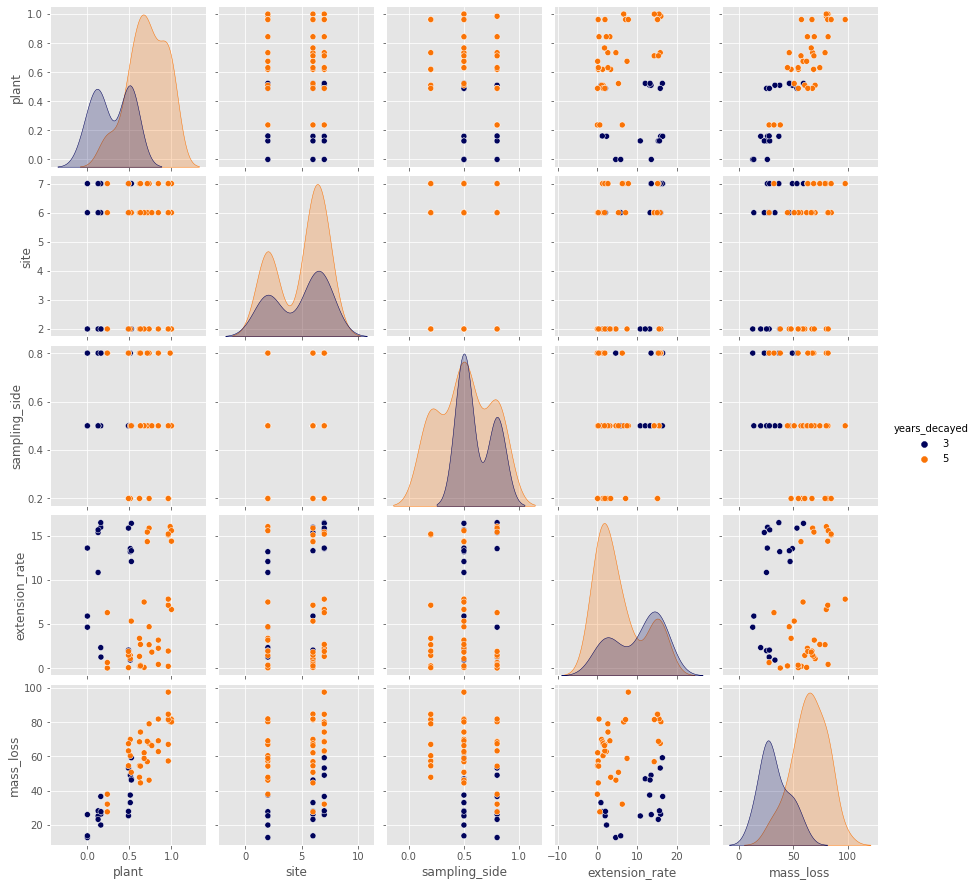

In [20]:
import warnings
warnings.filterwarnings('ignore')
import seaborn
plt.figure(figsize=(16,16),dpi=600)
#绘制变量关系图pairplot
palette=seaborn.xkcd_palette(['dark blue','orange'])
'''
seaborn.pairplot 函数参数：hue 具体的区分数据（这里是features中的季节）diag_kind 表示的是对角线上的kind
                         palette 调色板 表示的是指定颜色
'''
seaborn.pairplot(df6_1,hue='years_decayed',diag_kind='kde',palette=palette)
plt.rc('font',family='Times New Roman',size=12)
#plt.rcParams['font.sans-serif']='Fangsong'
plt.savefig('/Users/bingbing/Desktop/相关性.png')


In [21]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(df6_1.iloc[:,0:5],df6_1.iloc[:,5:6])
a  = model_1.intercept_#截距

b = model_1.coef_#回归系数

print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 [-15.93539971] ,回归系数： [[49.65245384  1.59960771  6.76036198  2.52512121  0.42178348]]


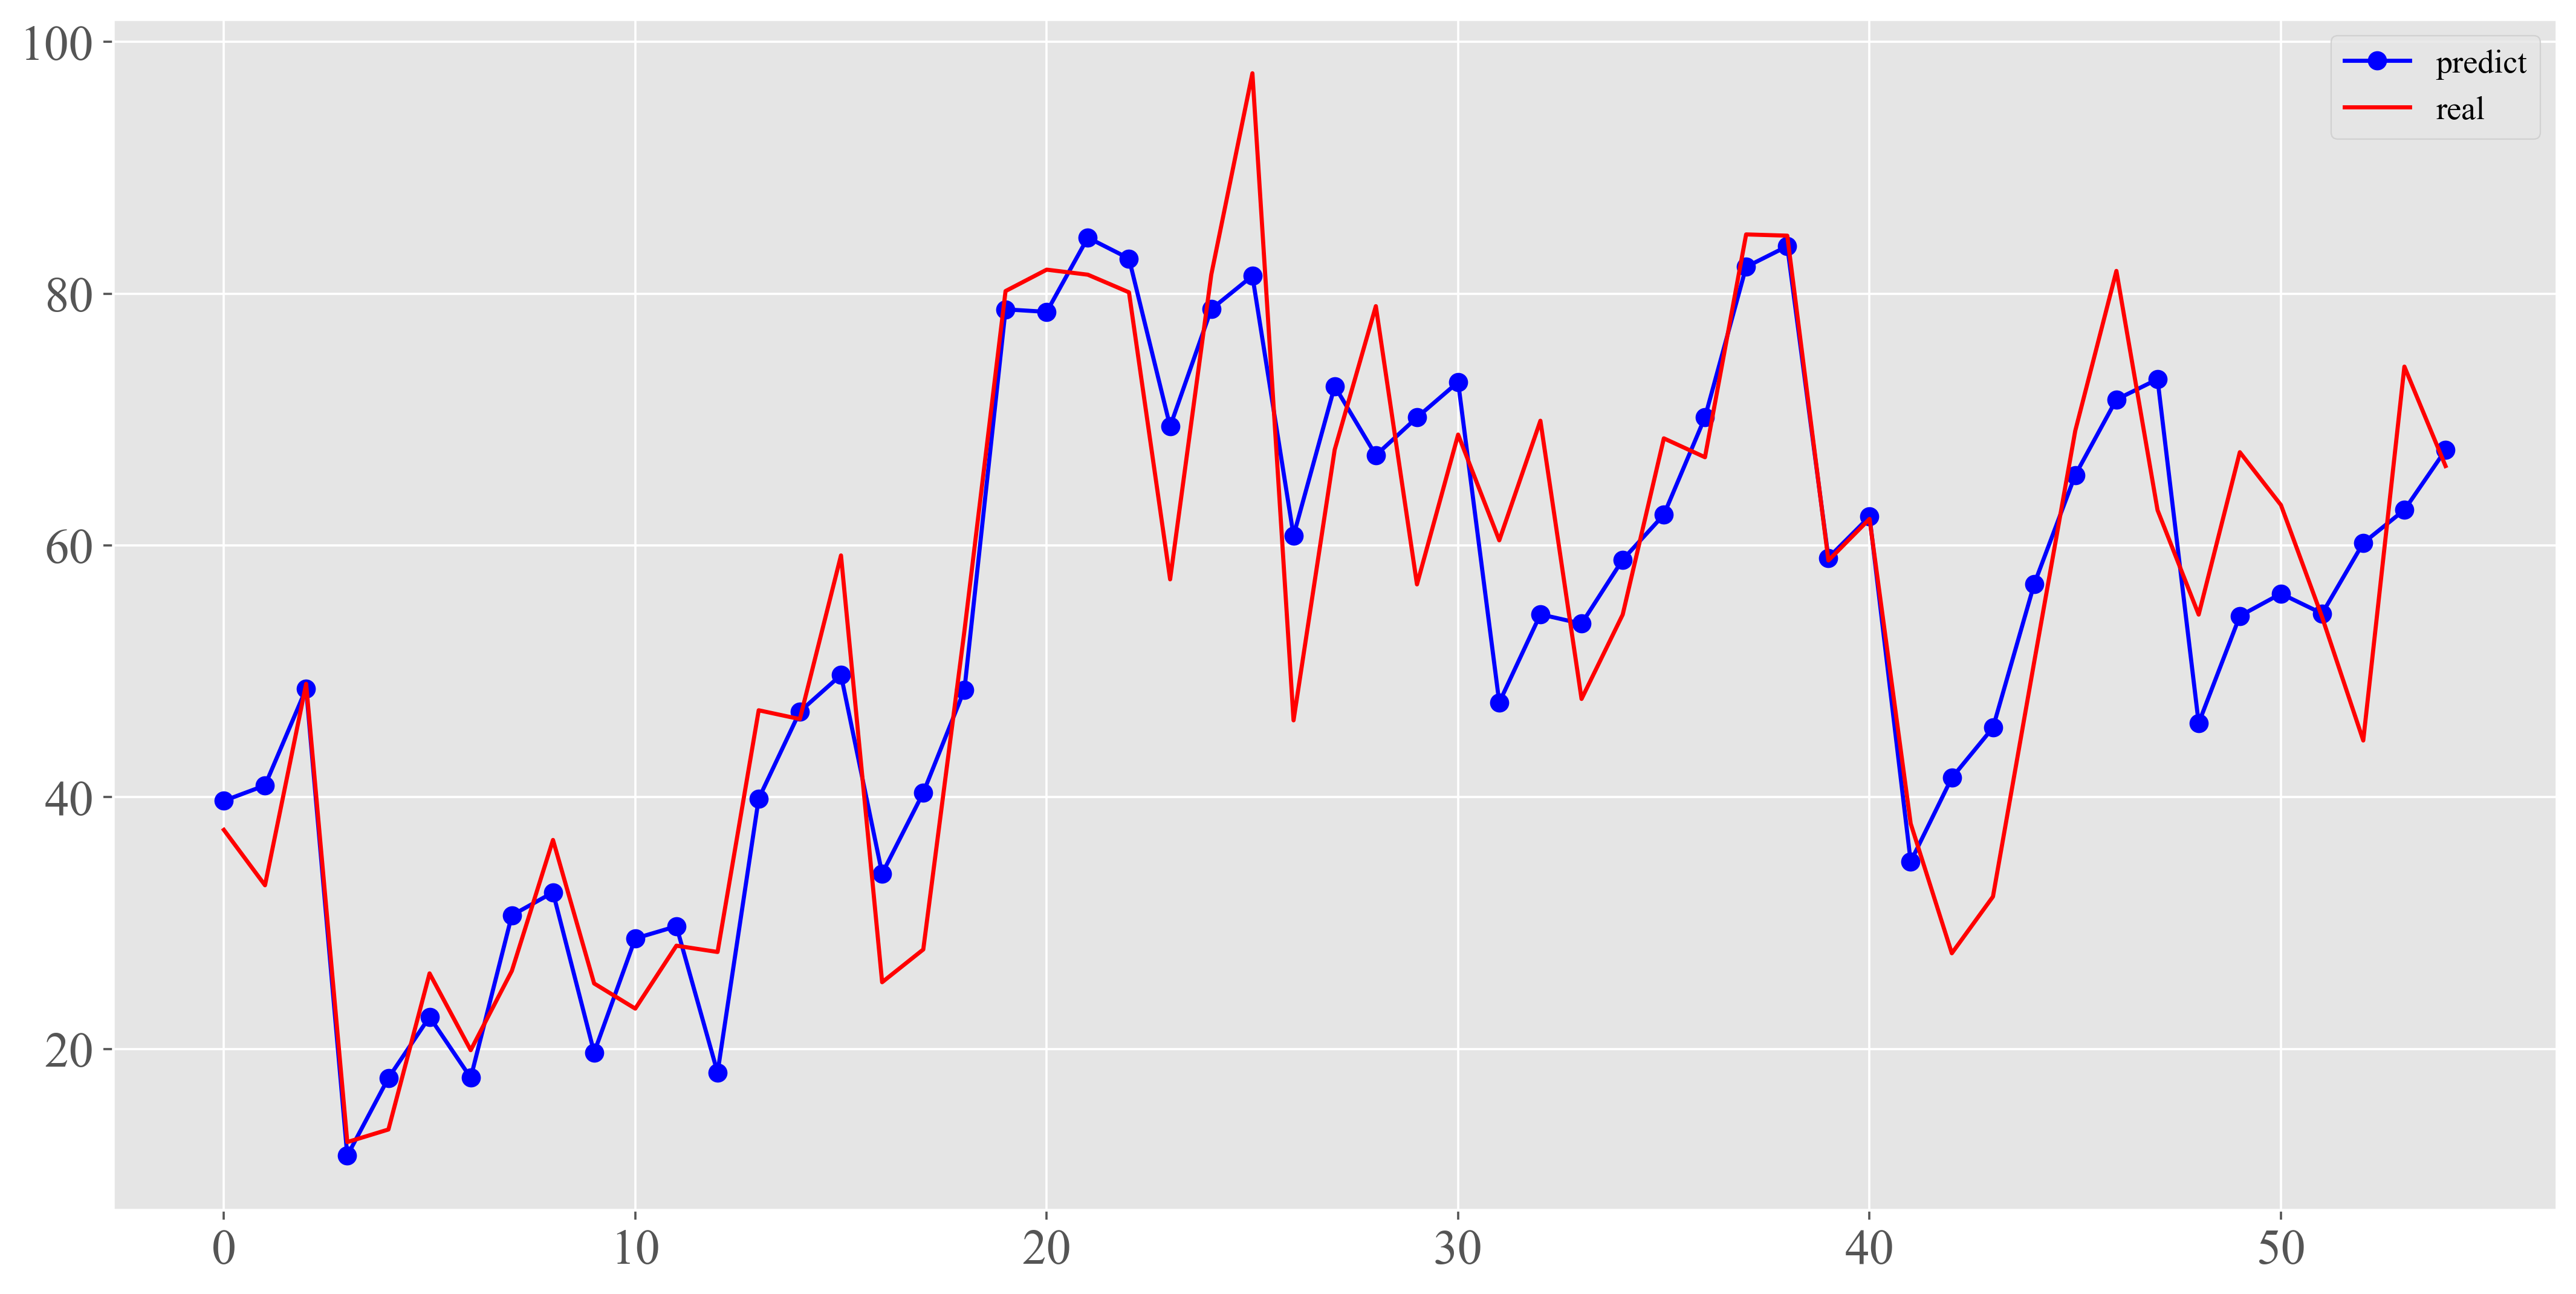

In [22]:
#模型拟合效果可视化
from matplotlib import font_manager
fm=font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf',size=18)
pre=model_1.predict(df6_1.iloc[:,0:5])
plt.figure(figsize=(16,8),dpi=326)
#plt.xticks(range(0,506,10),rotation=45)
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),pre,'b',label='predict',marker='o')
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),df6_1.iloc[:,5:6],'r',label='real')
plt.xticks(fontproperties=fm)
plt.yticks(fontproperties=fm)
plt.legend()
#plt.savefig('/Users/bingbing/Desktop/我的文件/Python Project/美赛数模/多元线性回归.png')


In [23]:
print(type(df6_1.iloc[:,5:6].values.reshape(-1)))
error2=abs(pre-df6_1.iloc[:,5:6].values.reshape(-1))
print('mean absolute value of error:',round(np.mean(error2),2),' degrees')

MAPE2=100*np.mean(error2/df6_1.iloc[:,5:6].values)
print('MAPE: ',round(MAPE2,2))
accuracy2=100-MAPE2
print('accuracy:',round(accuracy2,2),'%')

<class 'numpy.ndarray'>
mean absolute value of error: 23.44  degrees
MAPE:  60.09
accuracy: 39.91 %


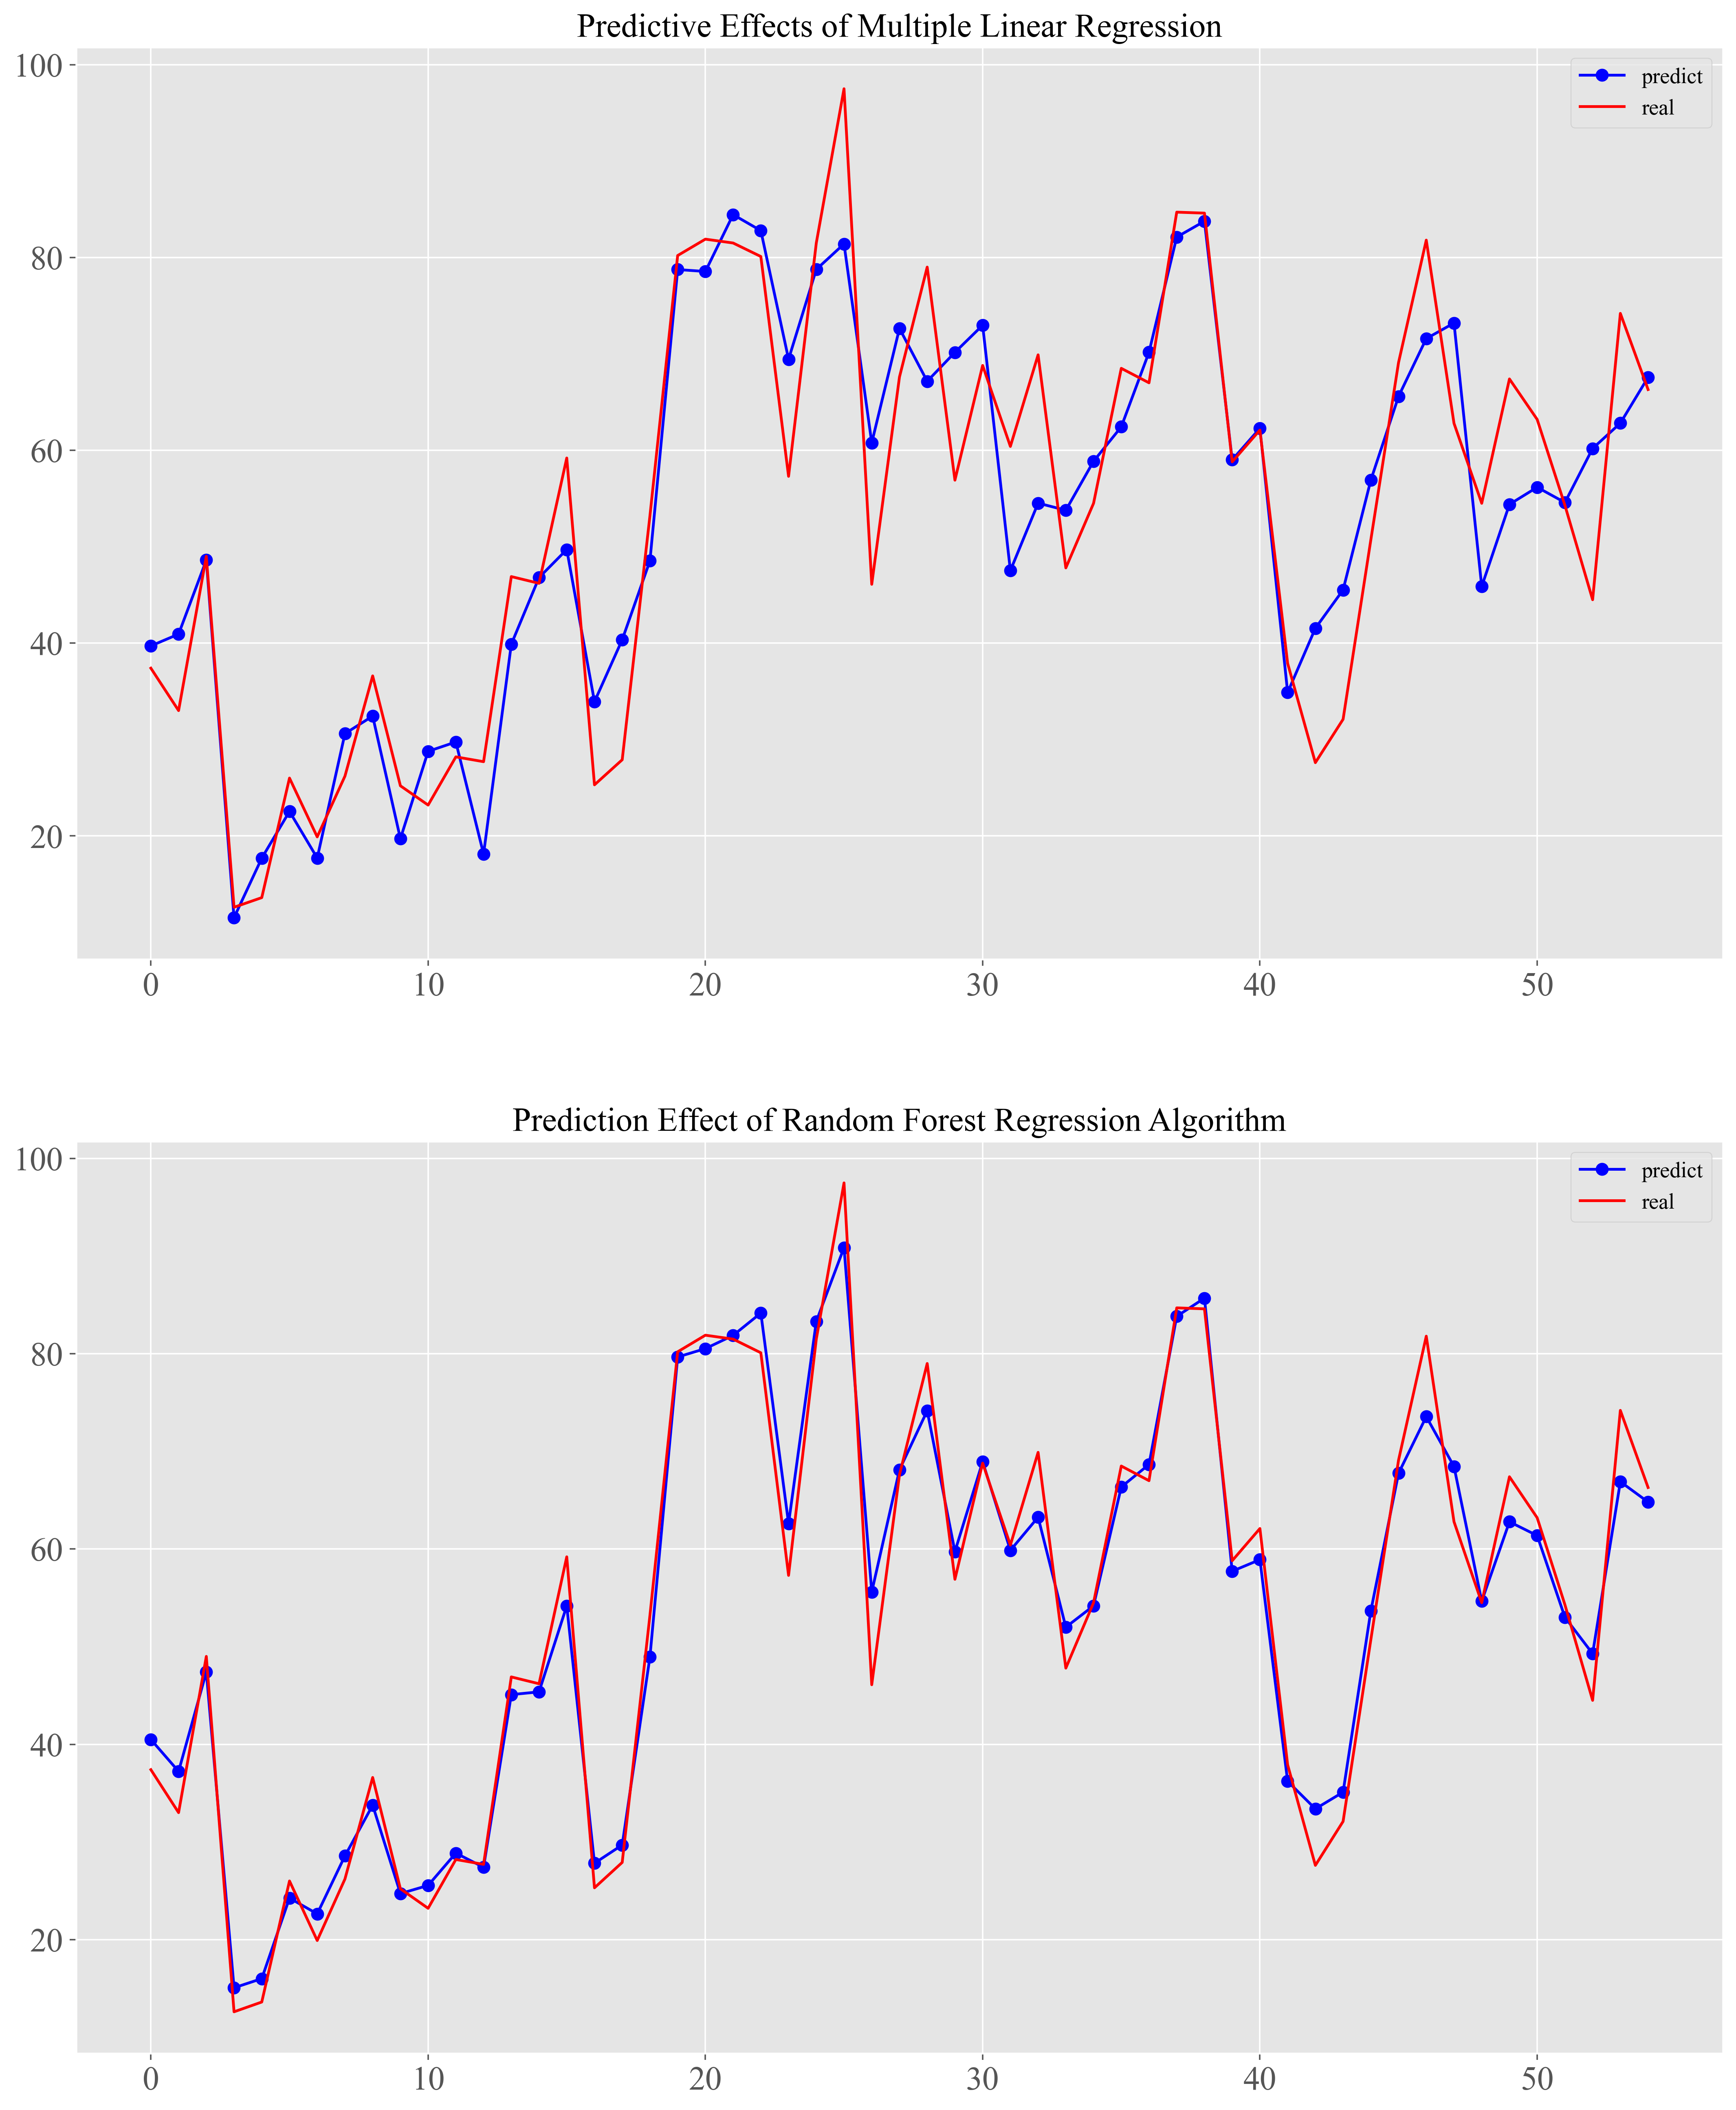

In [24]:
'''
下面是随机森林的预测模型
'''
from sklearn.ensemble import RandomForestRegressor
model_2=RandomForestRegressor(n_estimators=100,random_state=0)
model_2.fit(df6_1.iloc[:,0:5],df6_1.iloc[:,5:6])
pre_2=model_2.predict(df6_1.iloc[:,0:5])
plt.figure(figsize=(16,20),dpi=326)
#plt.xticks(range(0,506,10),rotation=45)
ax1=plt.subplot(211)
#plt.xticks(range(0,506,10),rotation=45)
plt.title('Predictive Effects of Multiple Linear Regression',fontproperties=fm)
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),pre,'b',label='predict',marker='o')
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),df6_1.iloc[:,5:6],'r',label='real')
plt.xticks(fontproperties=fm)
plt.yticks(fontproperties=fm)
plt.legend()
ax2=plt.subplot(212)
plt.title('Prediction Effect of Random Forest Regression Algorithm',fontproperties=fm)
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),pre_2,'b',label='predict',marker='o')
plt.plot(range(df6_1.iloc[:,0:5].shape[0]),df6_1.iloc[:,5:6],'r',label='real')
plt.xticks(fontproperties=fm)
plt.yticks(fontproperties=fm)
plt.legend()
plt.savefig('/Users/bingbing/Desktop/预测效果.png')

In [25]:
'''
评估模型 误差绝对值均值、平均绝对误差、准确度（100-平均绝对误差）
'''
print(type(df6_1.iloc[:,5:6].values.reshape(-1)))
error1=abs(pre_2-df6_1.iloc[:,5:6].values.reshape(-1))
print('mean absolute value of error:',round(np.mean(error1),2),' degrees')
MAPE1=100*np.mean(error1/df6_1.iloc[:,5:6].values)
print('MAPE: ',MAPE1)
accuracy1=100-MAPE1
print('accuracy:',round(accuracy1,2),'%')


<class 'numpy.ndarray'>
mean absolute value of error: 2.79  degrees
MAPE:  6.557160500083577
accuracy: 93.44 %


In [26]:
import math
#计算均方误差
from sklearn.metrics import mean_squared_error
RMSE1=math.sqrt(mean_squared_error(df6_1.iloc[:,5:6].values.reshape(-1),pre))
RMSE2=math.sqrt(mean_squared_error(df6_1.iloc[:,5:6].values.reshape(-1),pre_2))
print(RMSE1)
print(RMSE2)

8.014455917958468
3.5373159907169596


100%|██████████| 100/100 [00:00<00:00, 1319.57it/s]

0 3.5373159907169605
1 3.569343486395706
2 3.601898324552221
3 3.6349663365417606
4 3.6685336452068533
5 3.7025866708398127
6 3.737112135725888
7 3.772097067380672
8 3.8075288005919443
9 3.843394978372051
10 3.8796835519223696
11 3.916382779706492
12 3.9534812257236314
13 3.990967757068454
14 4.028831540858206
15 4.067062040602638
16 4.105649012087005
17 4.144582498833169
18 4.183852827198932
19 4.22345060117079
20 4.263366696900752
21 4.303592257033423
22 4.344118684865407
23 4.3849376383750975
24 4.42604102415731
25 4.467420991293694
26 4.509069925186642
27 4.550980441381496
28 4.593145379398984
29 4.635557796597374
30 4.678210962081364
31 4.721098350672742
32 4.764213636955699
33 4.807550689408018
34 4.85110356462769
35 4.894866501662996
36 4.938833916452821
37 4.9830003963826845
38 5.027360694960963
39 5.071909726618745
40 5.116642561635944
41 5.161554421195433
42 5.206640672566421
43 5.251896824417518
44 5.297318522259523
45 5.342901544017437
46 5.388641795730826
47 5.434535307381

<Figure size 9600x4800 with 0 Axes>

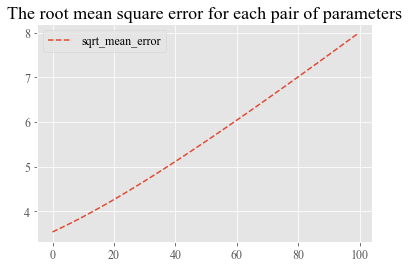

In [27]:
from tqdm import tqdm
mean_error=[]
for i in tqdm(range(100)):
    j=100-i
    num3=(i*(pre.reshape(-1))+pre_2*j)*0.01
    m1=math.sqrt(mean_squared_error(df6_1.iloc[:,5:6].values.reshape(-1), num3))
    mean_error.append(m1)
    print(i,m1)
error_df=pd.DataFrame({'sqrt_mean_error':mean_error},index=range(0,100))
plt.figure(figsize=(16,8),dpi=600)
error_df.plot(ls='--')
plt.title("The root mean square error for each pair of parameters",fontproperties=fm)
plt.show()

In [28]:
mos1=scaler.fit_transform(df4['mos'].values.reshape(-1,1))
mos1=(mos1-0.5)*22
df4['mos']=mos1
df4

extension   rate        mos
7        0.18   0.34  -6.630271
2        0.24   6.09   4.543018
4        0.24   5.90   4.420284
1        0.26   1.89   0.012179
6        0.26   1.92   0.073161
3        0.30   7.23   5.207466
5        0.32   0.11 -11.000000
0        0.36  10.21   6.543899
8        0.60   6.76   4.947187
9        0.60   0.14 -10.066154
10       0.68   3.67   2.581879
12       0.99  13.38   7.590937
33       1.00   7.45   5.323537
17       1.10   5.67   4.266310
26       1.24   6.12   4.562047
24       1.25   2.43   0.985338
23       1.26  12.86   7.437443
11       1.28  21.26   9.384058
25       1.52   4.52   3.388553
22       1.53  19.47   9.043481
31       1.64   3.32   2.193773
14       1.90   5.63   4.238895
16       3.06   9.30   6.182410
29       3.21  18.30   8.803502
15       3.31  20.28   9.201317
30       3.32   2.02   0.269766
32       3.37  16.74   8.458482
13       3.70   6.28   4.661982
20       5.70  18.52   8.849776
18       5.85  32.27  11.000000
19       6.50  15.95   8.271288
27       7.40  24.59   9.947522
28       7.40  21.10   9.354806
21       7.40   8.89   6.007819

In [29]:
df4_1=df4.drop('rate',axis=1)
df4_1

extension        mos
7        0.18  -6.630271
2        0.24   4.543018
4        0.24   4.420284
1        0.26   0.012179
6        0.26   0.073161
3        0.30   5.207466
5        0.32 -11.000000
0        0.36   6.543899
8        0.60   4.947187
9        0.60 -10.066154
10       0.68   2.581879
12       0.99   7.590937
33       1.00   5.323537
17       1.10   4.266310
26       1.24   4.562047
24       1.25   0.985338
23       1.26   7.437443
11       1.28   9.384058
25       1.52   3.388553
22       1.53   9.043481
31       1.64   2.193773
14       1.90   4.238895
16       3.06   6.182410
29       3.21   8.803502
15       3.31   9.201317
30       3.32   0.269766
32       3.37   8.458482
13       3.70   4.661982
20       5.70   8.849776
18       5.85  11.000000
19       6.50   8.271288
27       7.40   9.947522
28       7.40   9.354806
21       7.40   6.007819

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans2=KMeans(n_clusters=3)
kmeans.fit(df4_1)
kmeans2.fit(df4_1)
y_kmeans = kmeans.predict(df4_1)
y_kmeans2=kmeans2.predict(df4_1)
df4['class']=y_kmeans
df4.to_csv('biaoqian.csv')

[[ 2.13571429  8.5598886 ]
 [ 0.36666667 -9.23214159]
 [ 1.235       1.01934957]
 [ 6.70833333  8.90520182]
 [ 1.27166667  4.85713237]]


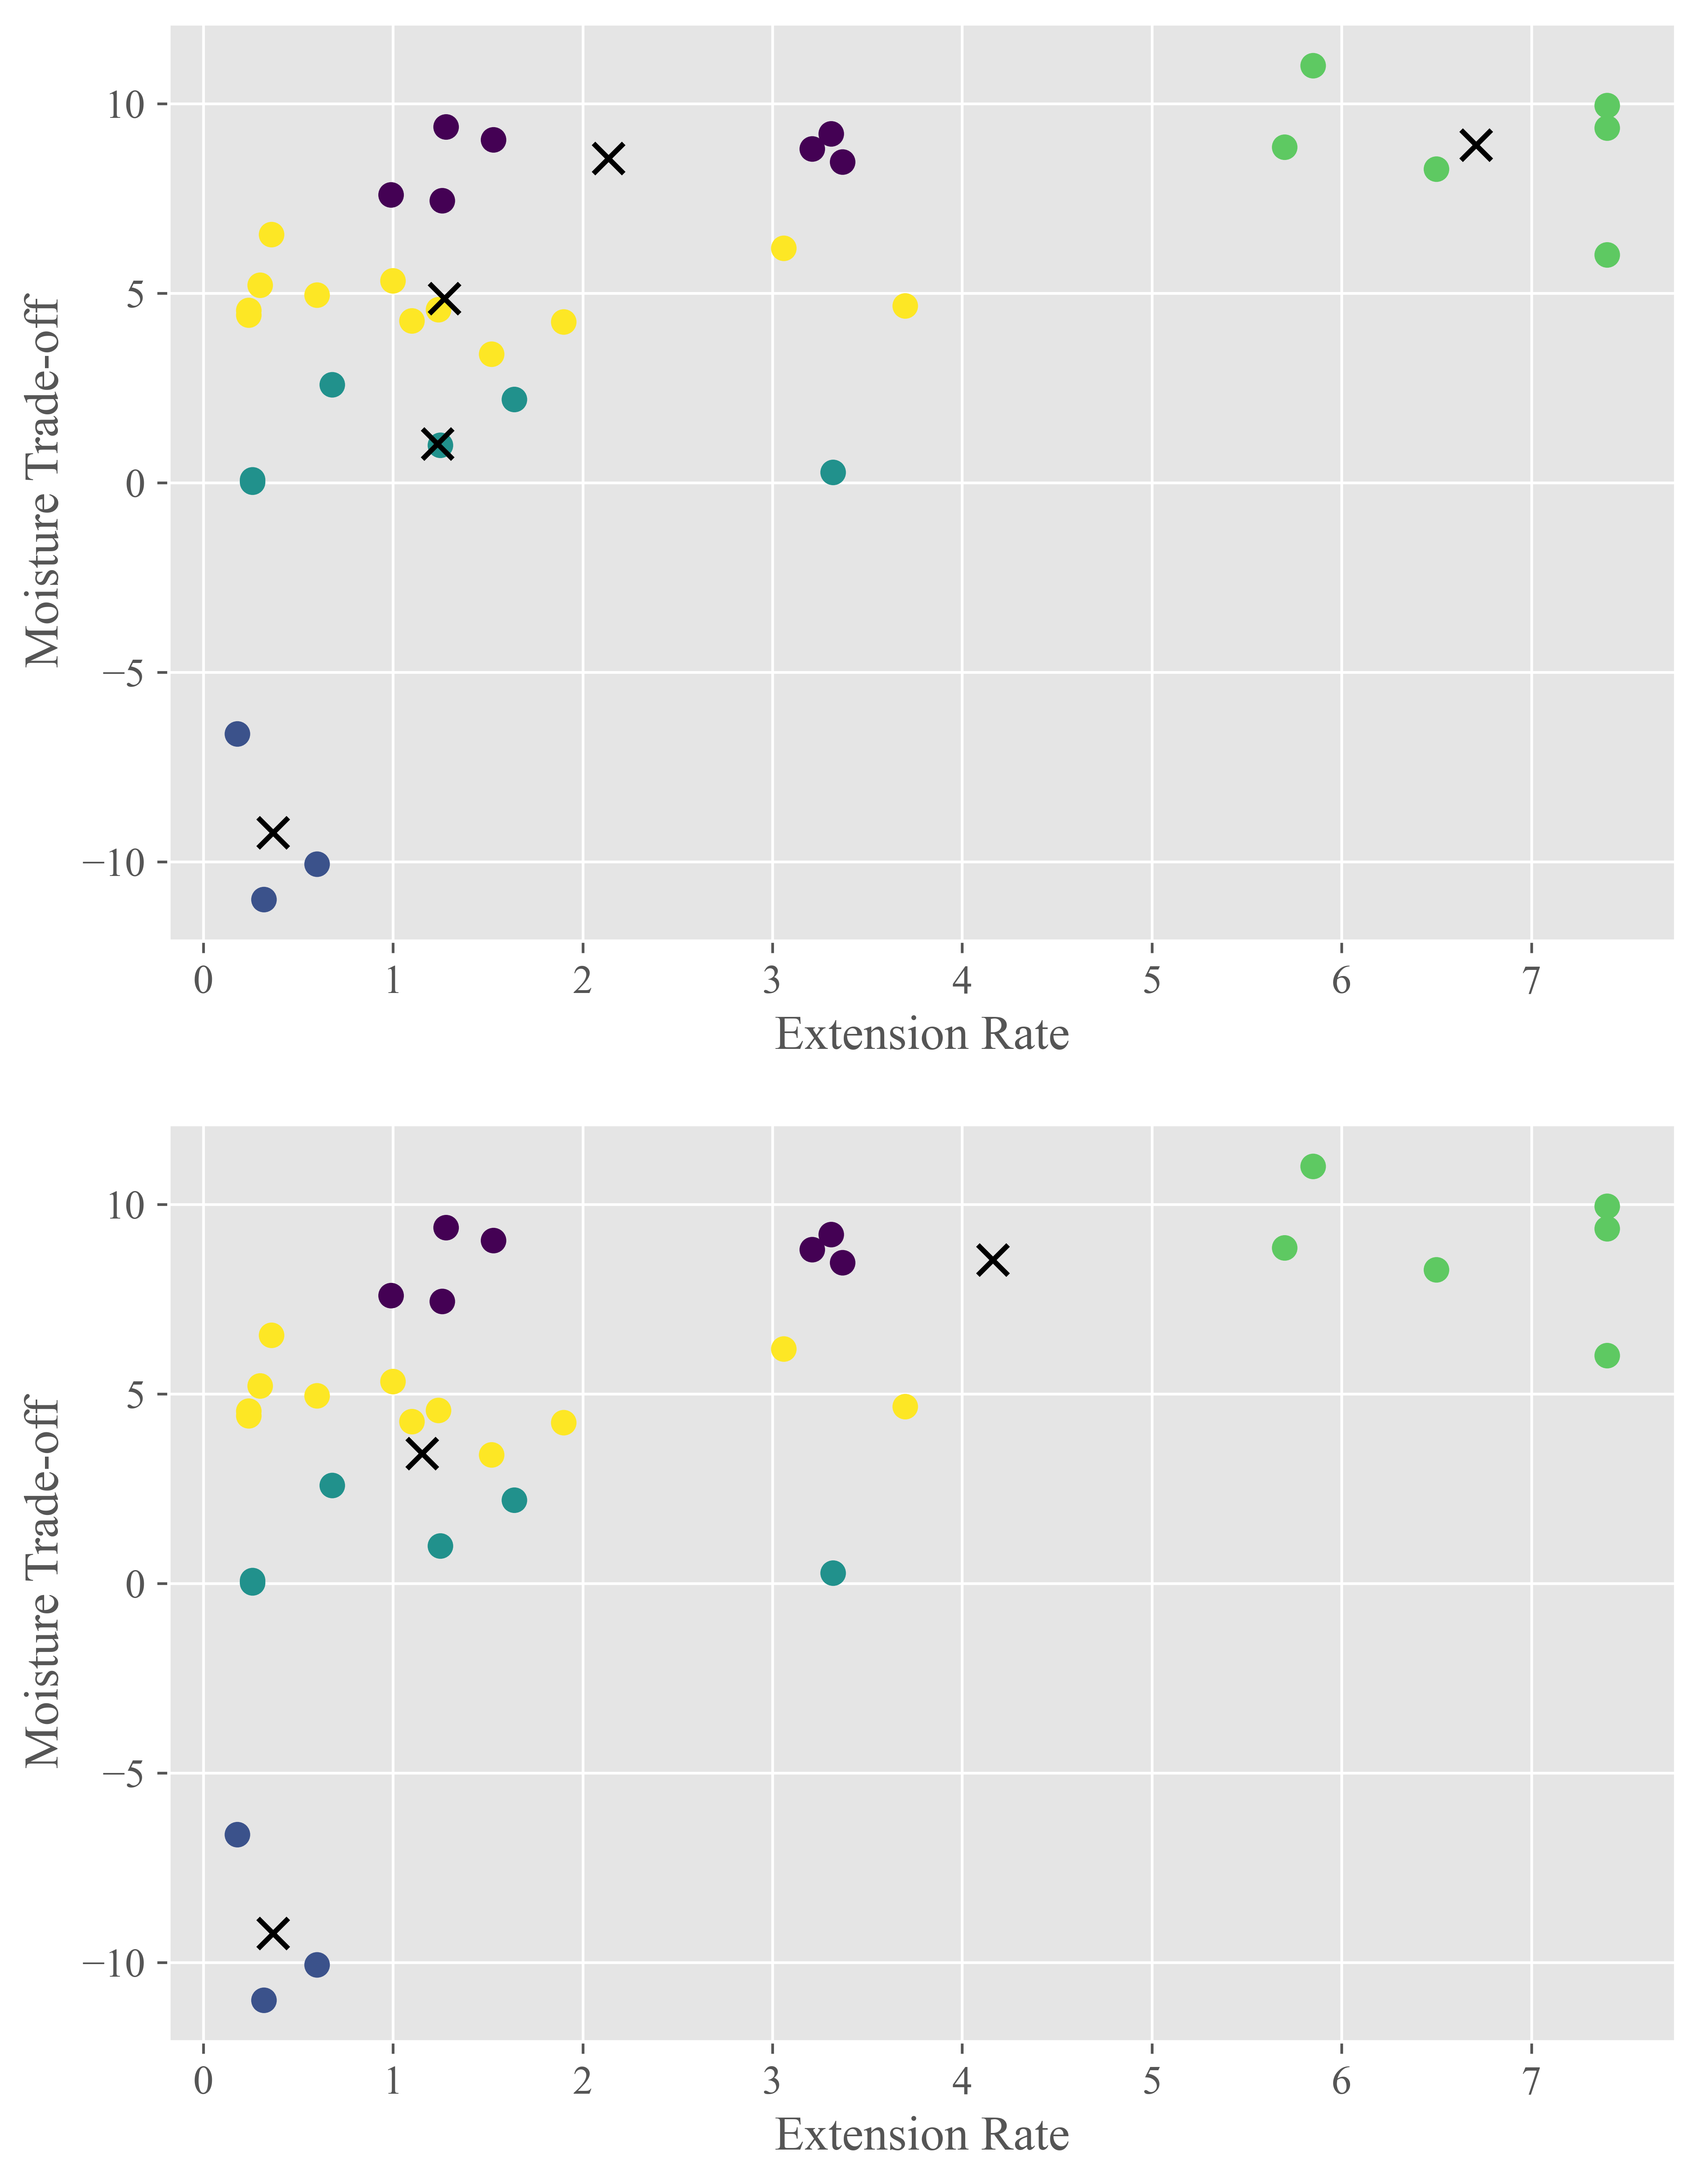

In [31]:
plt.figure(figsize=(8,11),dpi=600)
plt.title('Cluster analysis based on two dimensions')
ax1=plt.subplot(211)
plt.scatter(df4_1['extension'], df4_1['mos'], c=y_kmeans, s=50, cmap='viridis')
#聚类中心
centers = kmeans.cluster_centers_
print(centers)
plt.xlabel('Extension Rate')
plt.ylabel('Moisture Trade-off')
plt.scatter(centers[:,0], centers[:, 1], c='black', s=80, marker='x')
ax2=plt.subplot(212)
plt.scatter(df4_1['extension'], df4_1['mos'], c=y_kmeans, s=50, cmap='viridis')
#聚类中心
centers = kmeans2.cluster_centers_
plt.xlabel('Extension Rate')
plt.ylabel('Moisture Trade-off')
plt.scatter(centers[:,0], centers[:, 1], c='black', s=80, marker='x')
plt.savefig('/Users/bingbing/Desktop/聚类分析.png')

In [32]:
'''
第一 0.36
第二 0.815
第三 3.39
第四 6.7
'''
df6_1


plant  site  years_decayed sampling_side  extension_rate  mass_loss
0   0.510298     2              3           0.5           13.19       37.4
2   0.510298     6              3           0.5            0.92       33.0
4   0.510298     7              3           0.8           13.54       49.0
6        0.0     2              3           0.8            4.64       12.6
8        0.0     6              3           0.5            5.90       13.6
10       0.0     7              3           0.5           13.60       26.0
12  0.159435     2              3           0.5            2.33       19.9
14  0.159435     6              3           0.8           15.96       26.2
16  0.159435     7              3           0.8           16.48       36.6
19  0.127548     2              3           0.5           10.84       25.2
21  0.127548     6              3           0.8           15.36       23.2
23  0.127548     7              3           0.5           15.66       28.2
25  0.161526     2              3           0.8            1.26       27.7
26  0.523262     2              3           0.5           12.08       46.9
28  0.523262     6              3           0.5           13.30       46.2
30  0.523262     7              3           0.5           16.40       59.2
32  0.489022     2              3           0.5            1.98       25.3
34  0.489022     6              3           0.5            2.05       27.9
36  0.489022     7              3           0.8           15.86       53.2
38  0.984841     2              5           0.8           16.03       80.2
39       1.0     2              5           0.5           15.57       81.9
40       1.0     6              5           0.5           14.38       81.5
41       1.0     7              5           0.5            6.65       80.1
42  0.962363     2              5           0.2            0.22       57.3
43  0.962363     6              5           0.2            7.13       81.5
44  0.962363     7              5           0.5            7.82       97.5
45  0.734449     2              5           0.5            4.69       46.1
46  0.734449     6              5           0.8           15.86       67.6
47  0.734449     7              5           0.2            2.66       79.0
48  0.712755     6              5           0.5           14.33       56.9
49  0.712755     7              5           0.8           15.41       68.8
50  0.510298     2              5           0.2            1.45       60.4
51  0.510298     6              5           0.5            1.08       69.9
52  0.619969     2              5           0.2            3.38       47.8
53  0.619969     6              5           0.2            0.26       54.5
54  0.619969     7              5           0.8            1.34       68.5
55  0.962363     2              5           0.2            1.94       67.0
56  0.962363     6              5           0.2           15.09       84.7
57  0.962363     7              5           0.2           15.19       84.6
58  0.675118     2              5           0.5            7.49       58.8
59  0.675118     6              5           0.5            0.09       62.1
60  0.237324     2              5           0.8            0.02       37.9
61  0.237324     6              5           0.8            0.64       27.6
62  0.237324     7              5           0.8            6.29       32.1
63  0.522216     6              5           0.5            5.33       50.7
64  0.844224     2              5           0.5            3.18       69.1
65  0.844224     6              5           0.8            0.43       81.8
66  0.844224     7              5           0.5            2.26       62.8
67  0.489022     2              5           0.2            0.06       54.5
68  0.489022     6              5           0.8            1.48       67.4
69  0.489022     7              5           0.8            1.90       63.2
70  0.631469     2              5           0.8            0.34       54.3
71  0.631469     6              

In [33]:
extension_rate=[0.36,1.94,7.82,15.86]
sampling_side=[0.1,0.4,0.8,0.6,0.7]
pre_list=[]
for i in range(len(extension_rate)):

    plant=[0.510298]*5
    site=[2]*5
    years_decayed=[3]*5
    for j in range(len(sampling_side)):
        extension_rate_list=[extension_rate[i]]*5
    df6_4=pd.DataFrame({'plant':plant,'site':site,'years_decayed':years_decayed,'sampling_side':sampling_side,'extension_rate':extension_rate_list})
    pre=model_2.predict(df6_4)
    pre_list.append(pre)

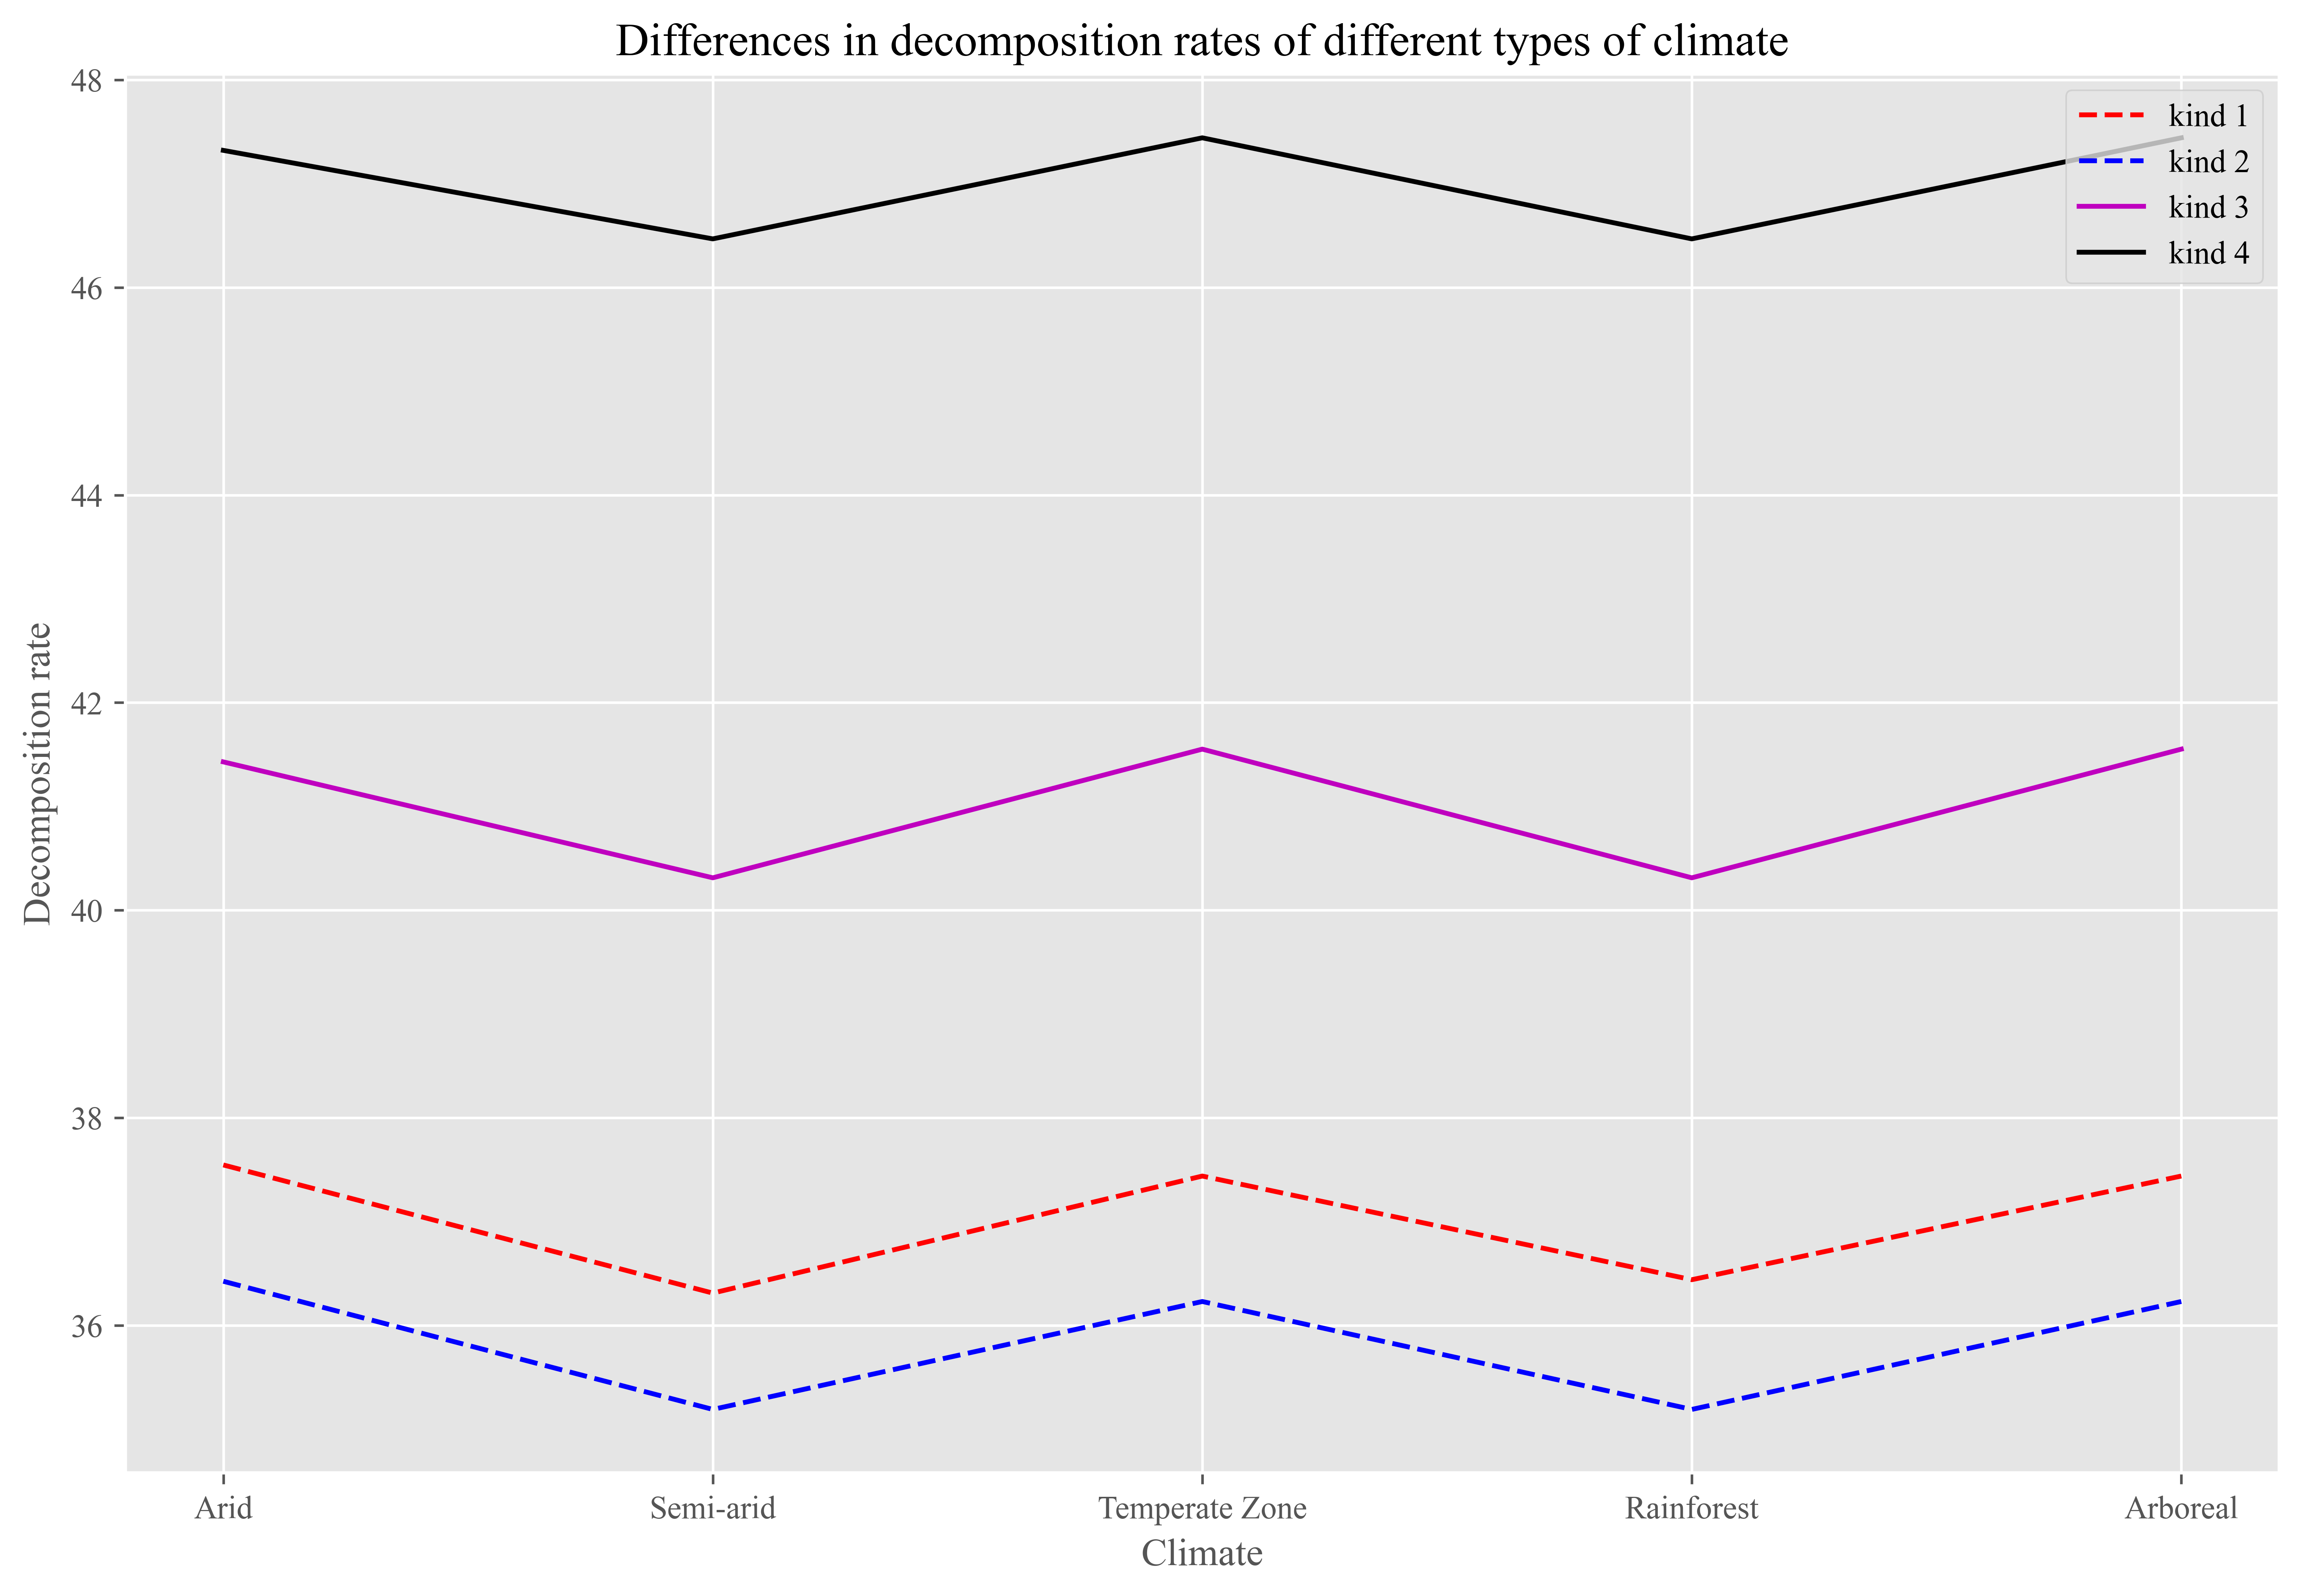

In [34]:
list1=['Arid','Semi-arid','Temperate Zone','Rainforest','Arboreal']
plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=600)
plt.title('Differences in decomposition rates of different types of climate')
plt.plot(['Arid','Semi-arid','Temperate Zone','Rainforest','Arboreal'],pre_list[0],color = 'r',label='kind 1',ls='--')
plt.plot(['Arid','Semi-arid','Temperate Zone','Rainforest','Arboreal'],pre_list[1],color = 'b',label='kind 2',ls='--')
plt.plot(['Arid','Semi-arid','Temperate Zone','Rainforest','Arboreal'],pre_list[2],color = 'm',label='kind 3')
plt.plot(['Arid','Semi-arid','Temperate Zone','Rainforest','Arboreal'],pre_list[3],color = 'black',label='kind 4')
plt.xlabel('Climate')
plt.ylabel('Decomposition rate')
plt.legend()
plt.savefig('/Users/bingbing/Desktop/气候特征.png')


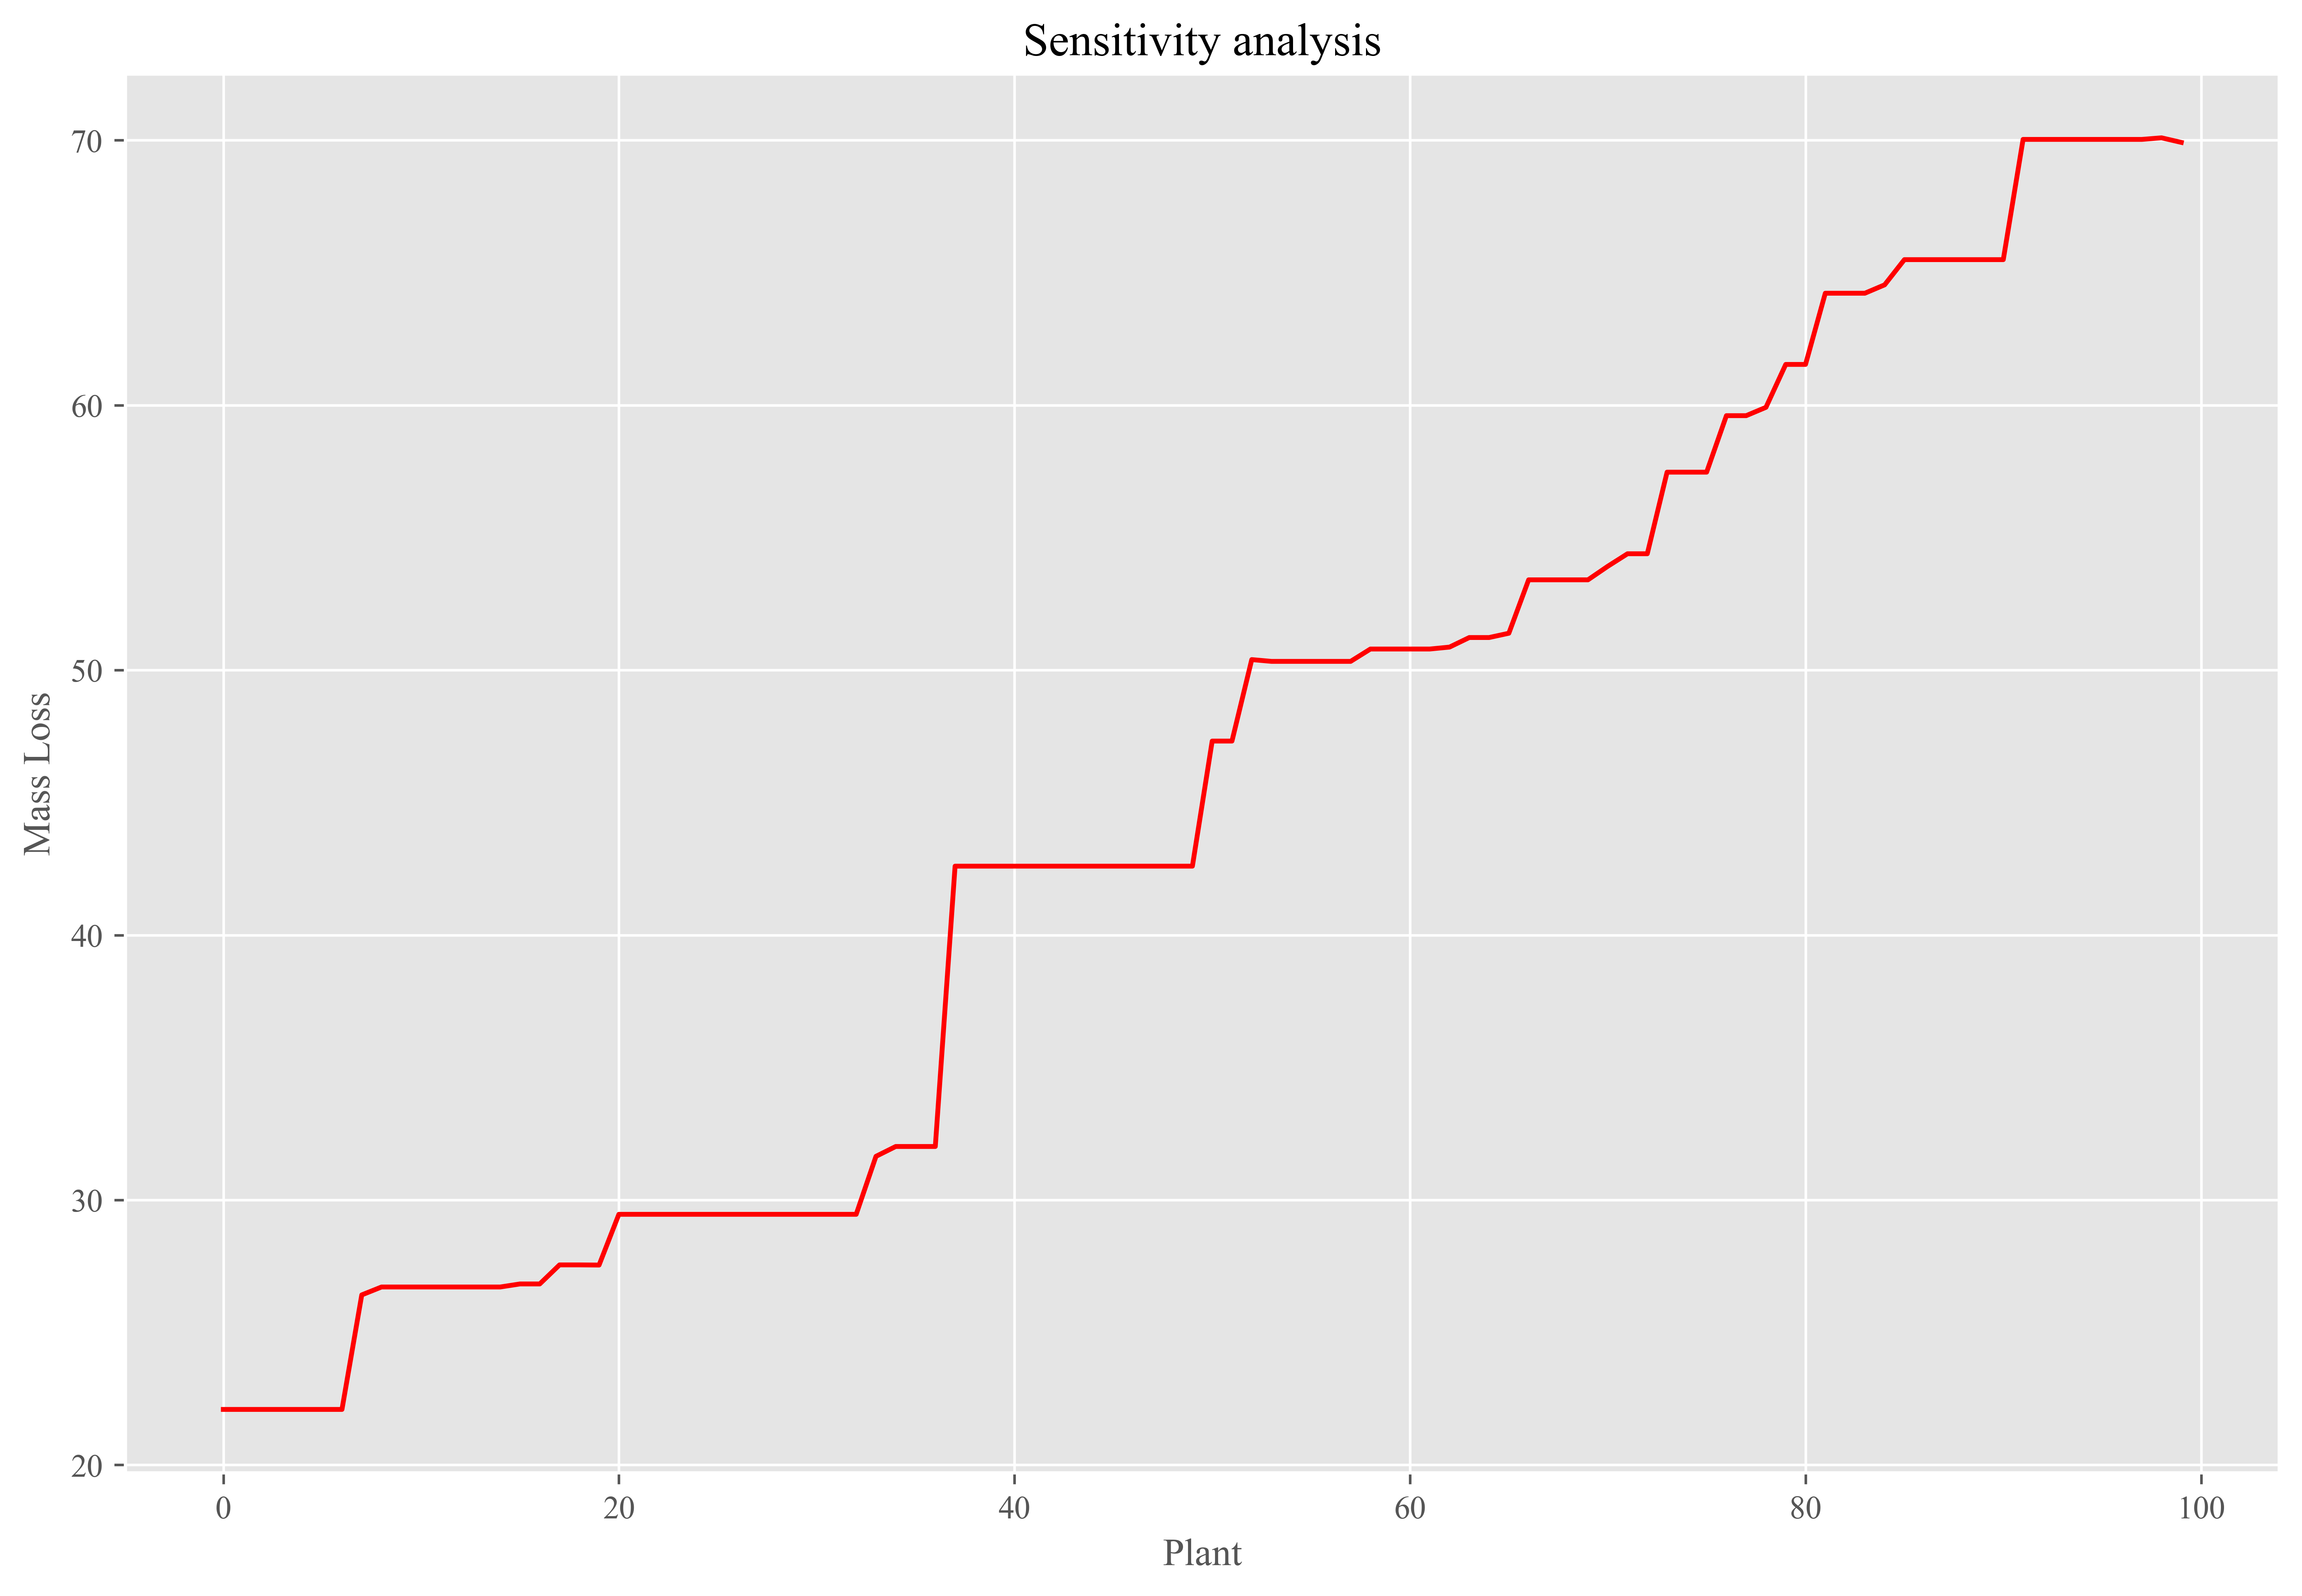

In [37]:
extension_rate=[15.86]*100
sampling_side=[0.2]*100
plant=[ i*0.01 for i in range(100)]
site=[2]*100
years_decayed=[3]*100

df6_4=pd.DataFrame({'plant':plant,'site':site,'years_decayed':years_decayed,'sampling_side':sampling_side,'extension_rate':extension_rate})
pre=model_2.predict(df6_4)

plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=600)
plt.title('Sensitivity analysis')
plt.plot(range(len(pre)),pre,color = 'r')
plt.xlabel('Plant')
plt.ylabel('Mass Loss')
plt.savefig('/Users/bingbing/Desktop/灵敏度分析.png')

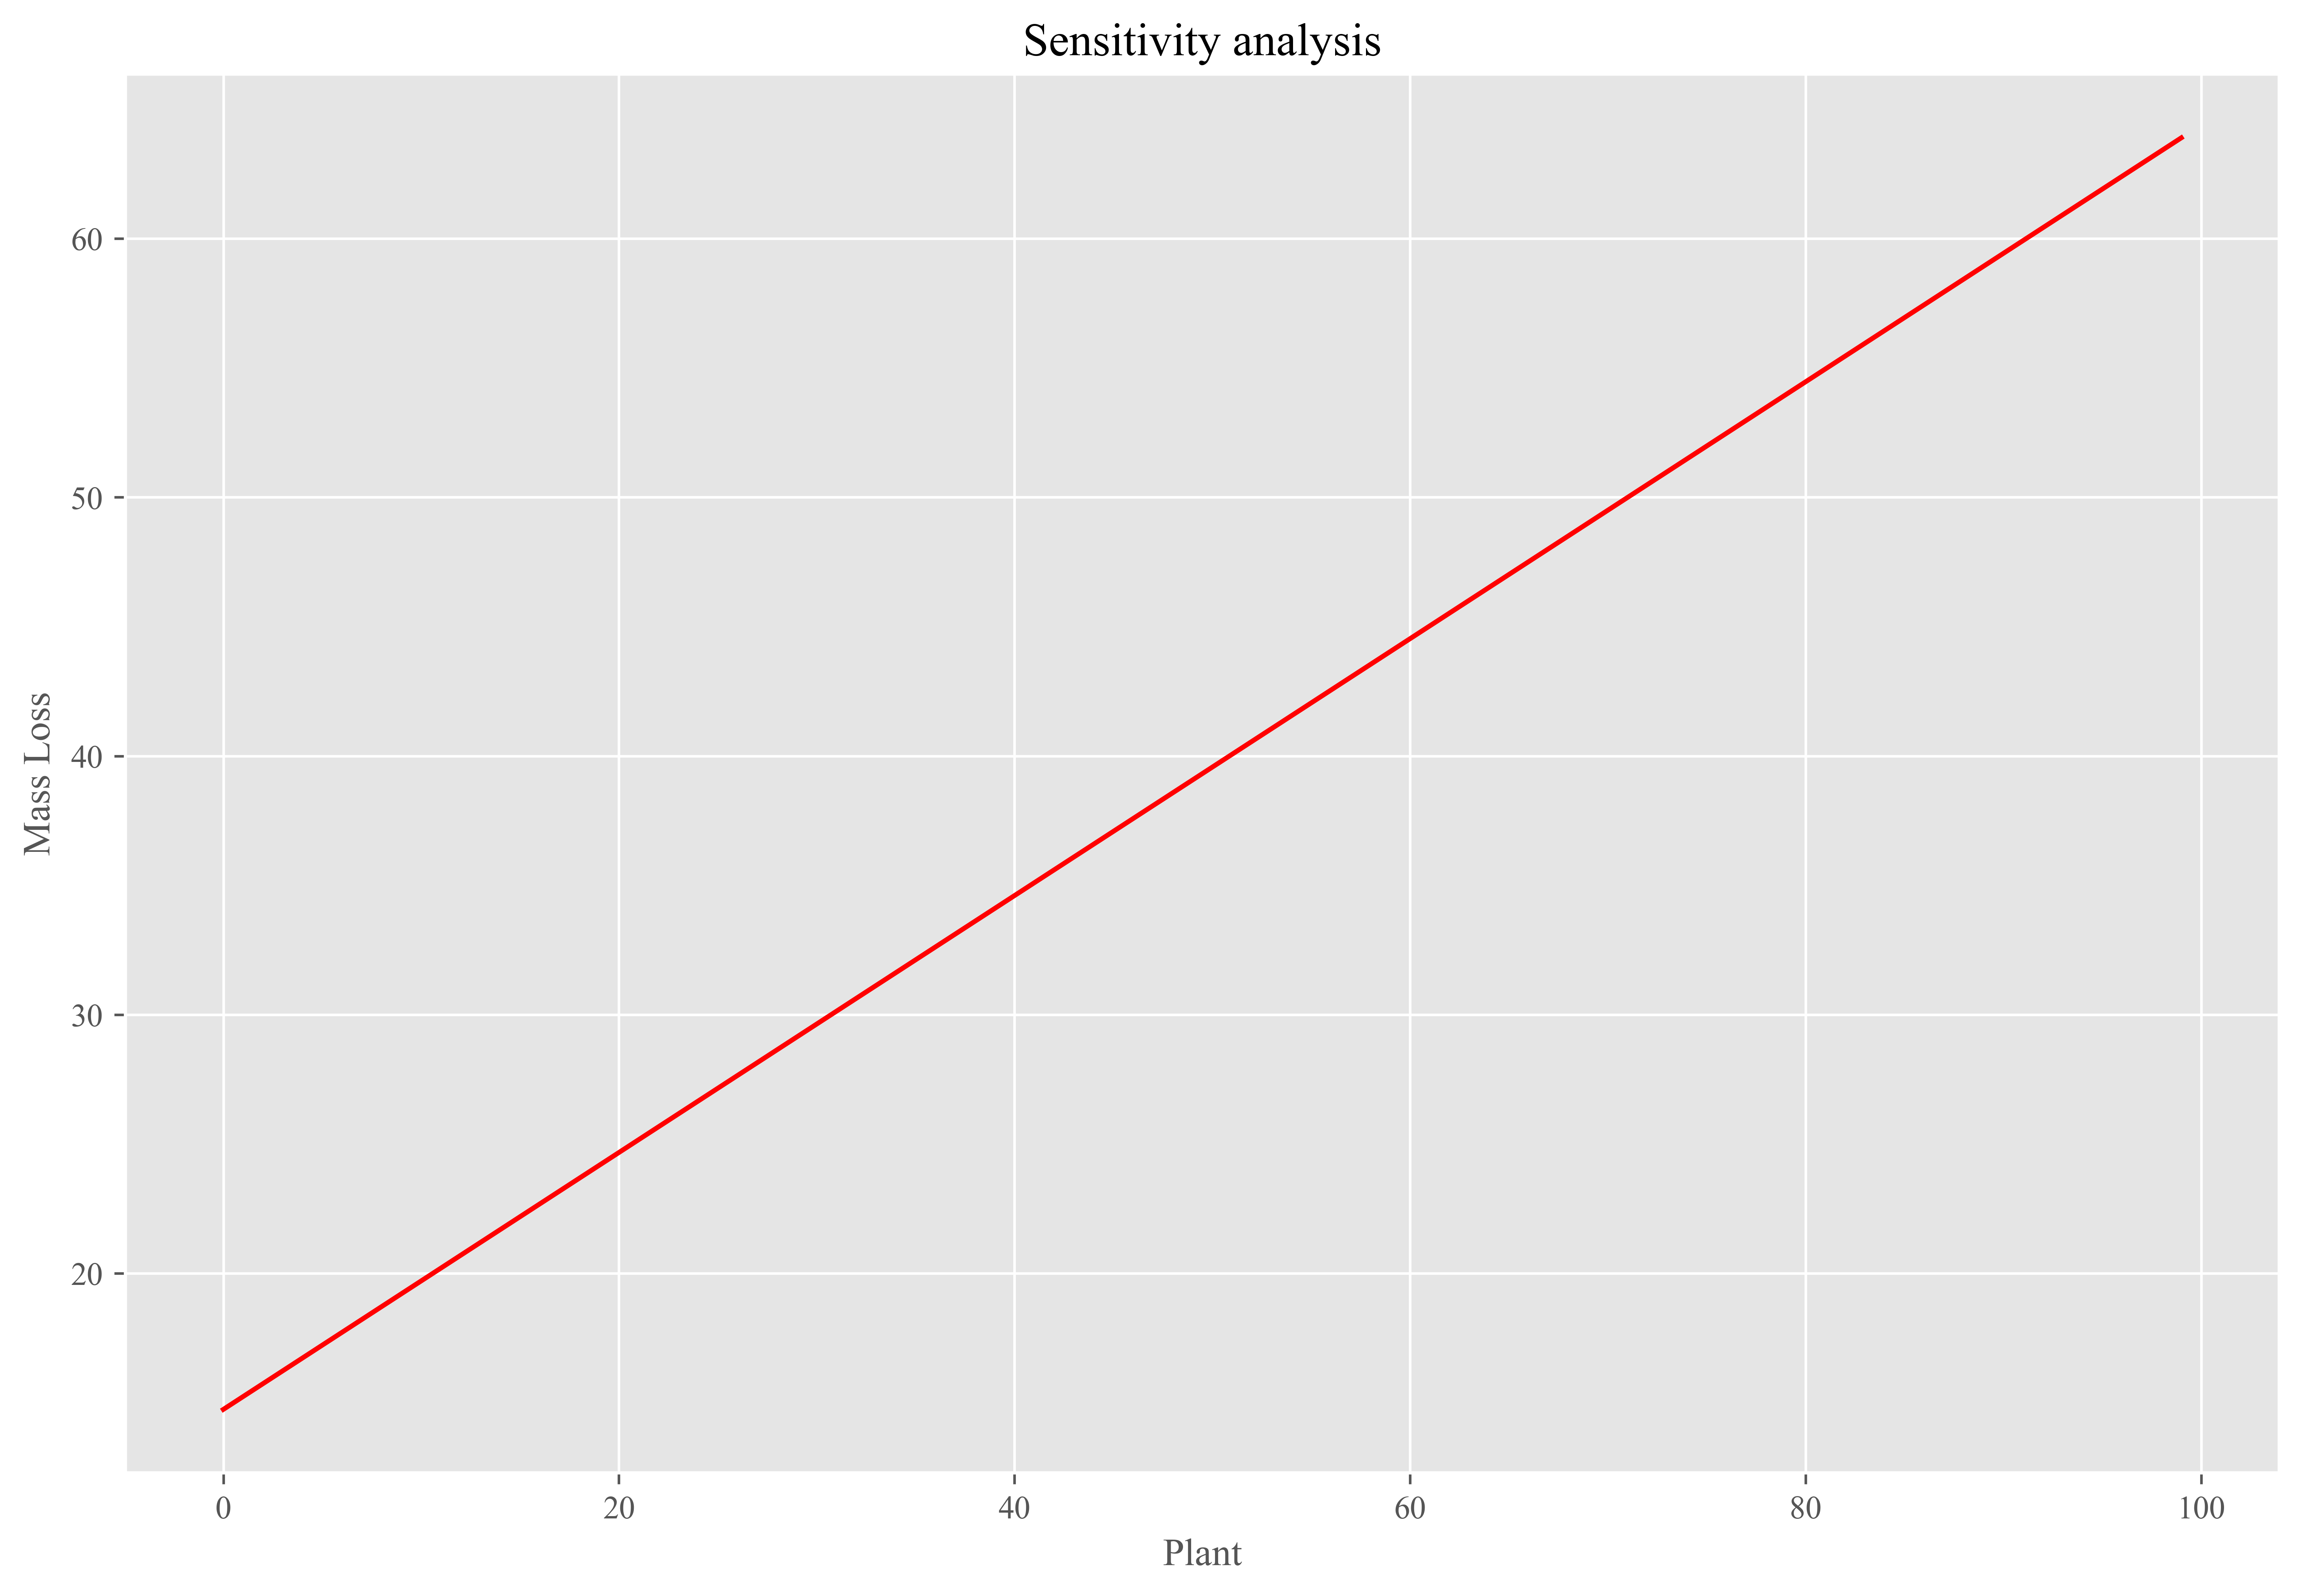

In [38]:
extension_rate=[15.86]*100
sampling_side=[0.2]*100
plant=[ i*0.01 for i in range(100)]
site=[2]*100
years_decayed=[3]*100

df6_4=pd.DataFrame({'plant':plant,'site':site,'years_decayed':years_decayed,'sampling_side':sampling_side,'extension_rate':extension_rate})
pre=model_1.predict(df6_4)

plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=600)
plt.title('Sensitivity analysis')
plt.plot(range(len(pre)),pre,color = 'r')
plt.xlabel('Plant')
plt.ylabel('Mass Loss')
plt.savefig('/Users/bingbing/Desktop/灵敏度分析2.png')


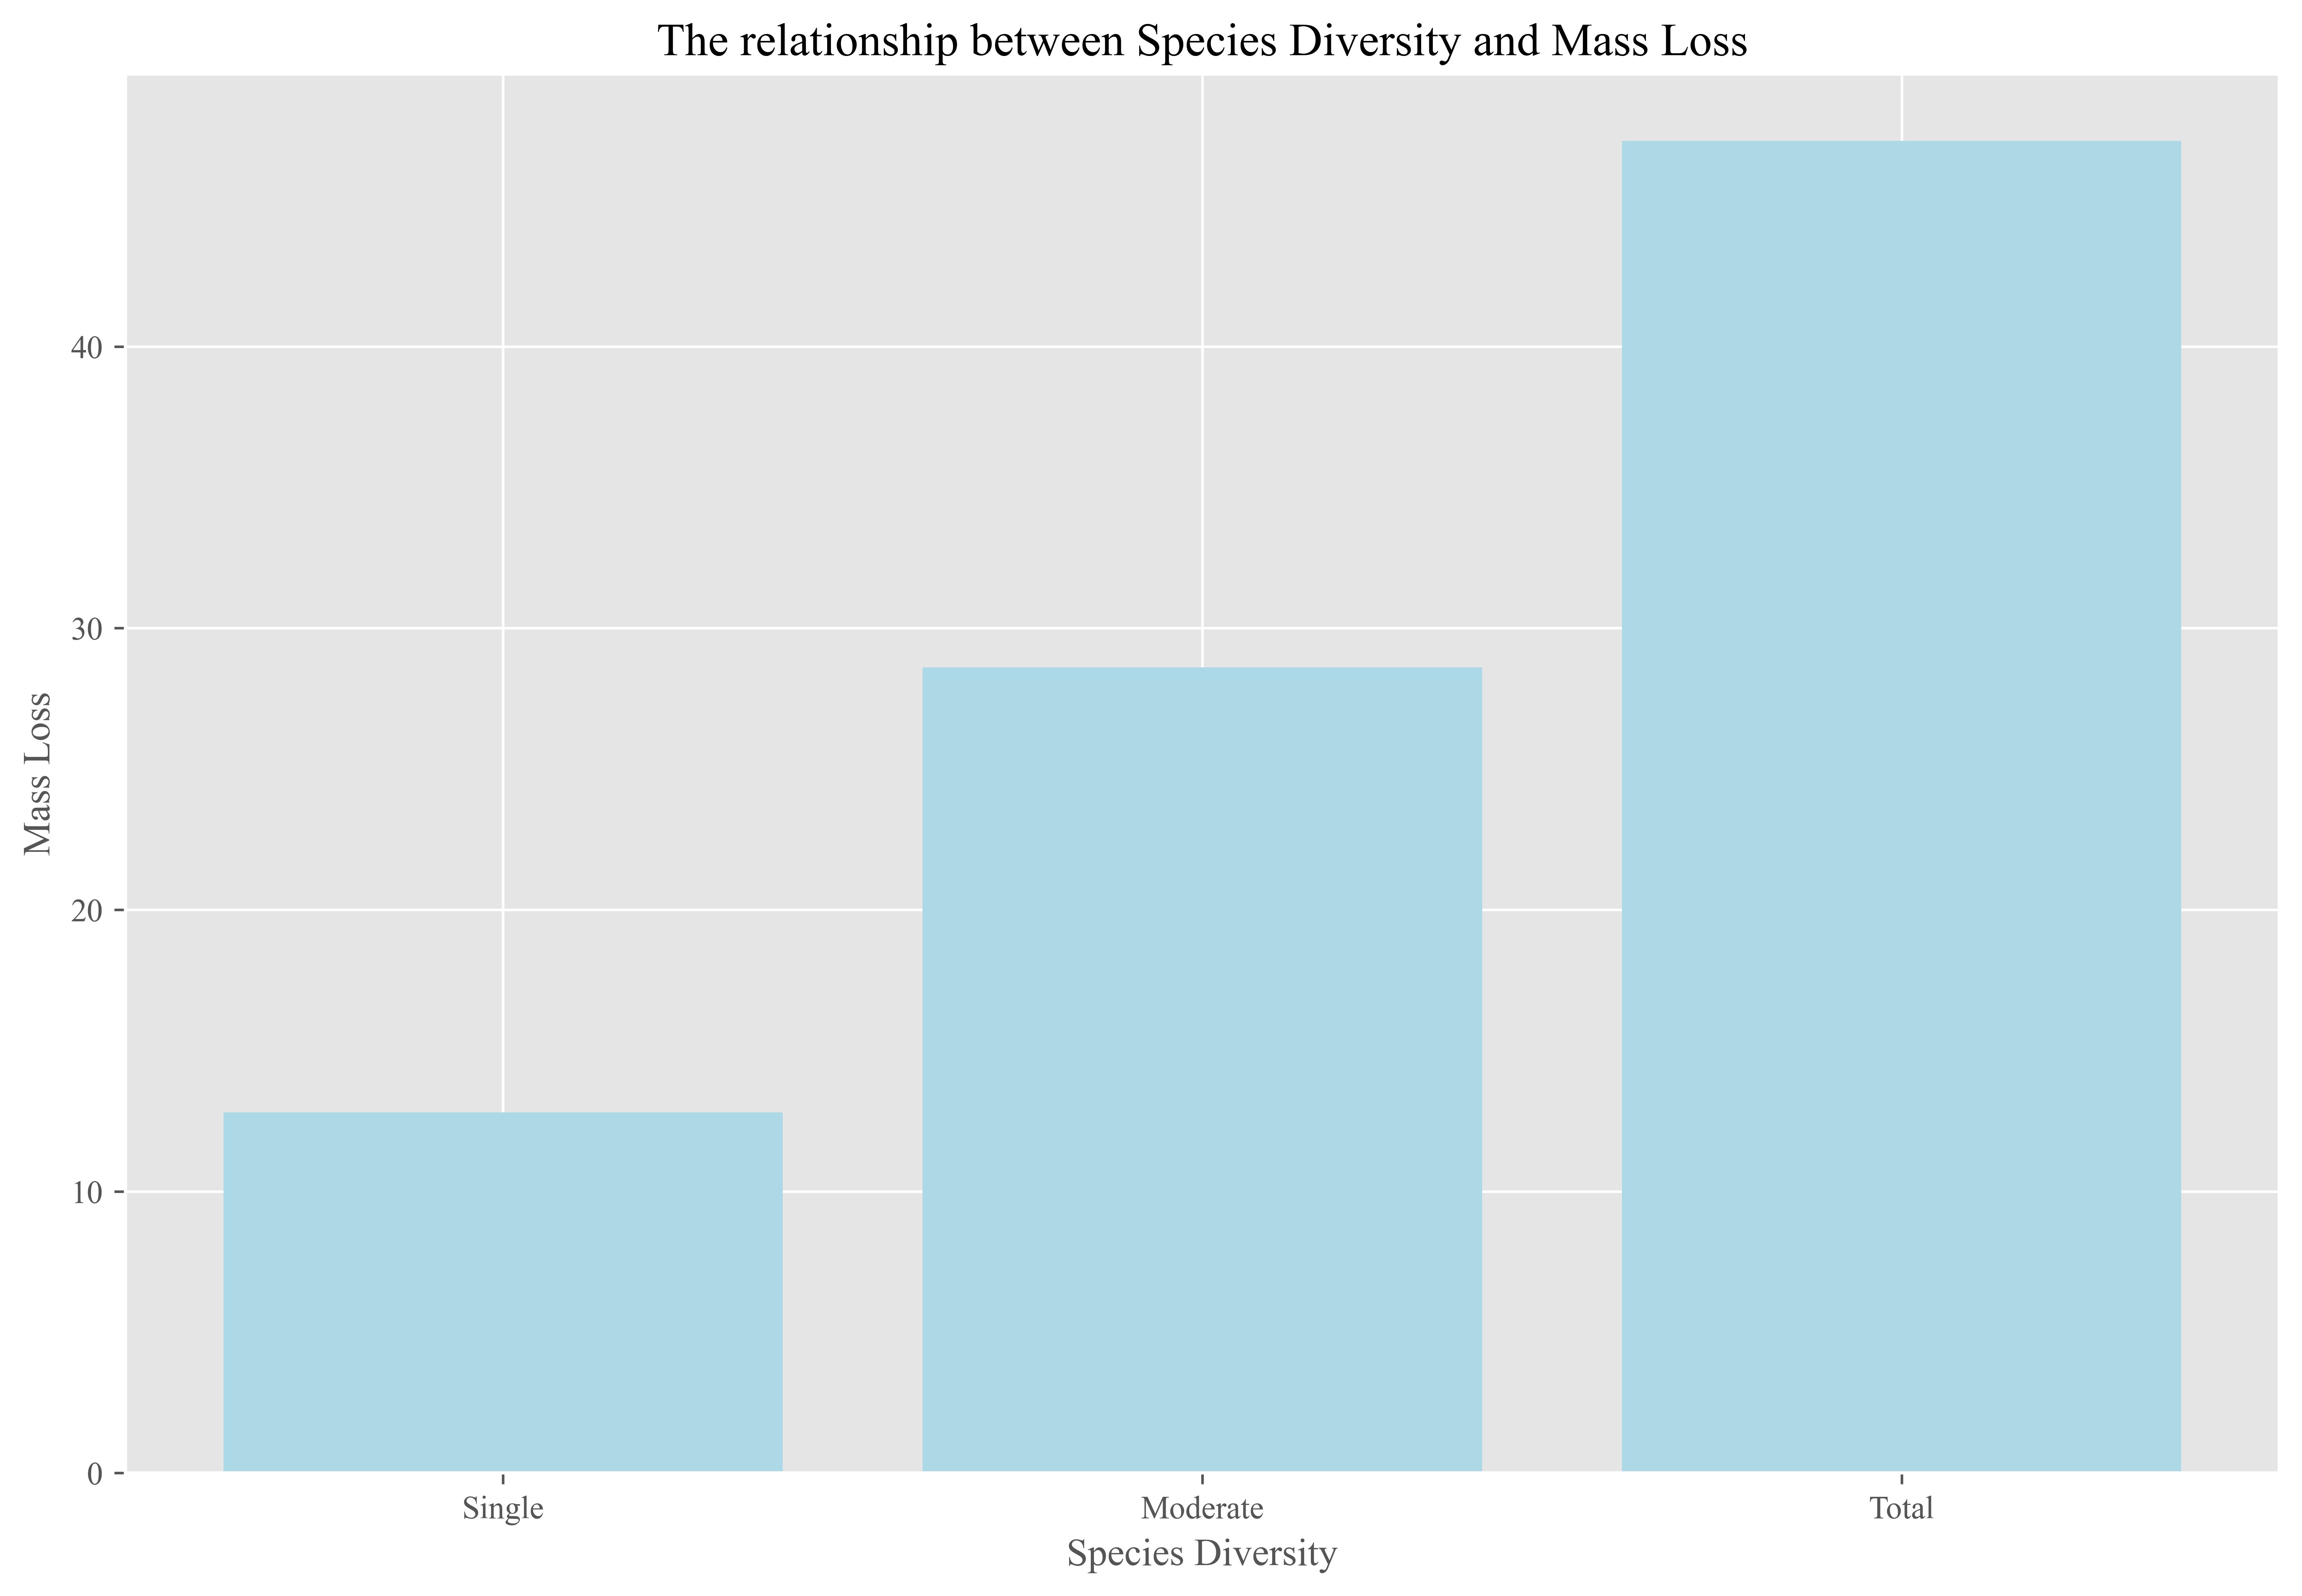

In [43]:
rate3=[12.81,28.6,47.3]
plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=600)
plt.title('The relationship between Species Diversity and Mass Loss')
plt.bar(['Single','Moderate','Total'],rate3,color = 'lightblue')
plt.xlabel('Species Diversity')
plt.ylabel('Mass Loss')
plt.savefig('/Users/bingbing/Desktop/物种多样性.png')